## Main Objective: Predicting Customer Preferences for the Wellness Tourism Package

The primary goal is to develop a predictive model that identifies customers more likely to purchase the new Wellness Tourism Package. This involves building detailed customer profiles based on available data and pinpointing the features that significantly influence their decision-making process. The objective is to streamline marketing efforts, making them more efficient and targeted, ultimately maximizing the success of the new product launch.

Data Dictionary

**Customer Details:**

- `CustomerID`: Unique customer ID
- `ProdTaken`: Whether the customer has purchased a package or not (0: No, 1: Yes)
- `Age`: Age of customer
- `TypeofContact`: How the customer was contacted (Company Invited or Self Inquiry)
- `CityTier`: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- `Occupation`: Occupation of the customer
- `Gender`: Gender of the customer
- `NumberOfPersonVisiting`: Total number of persons planning to take the trip with the customer
- `PreferredPropertyStar`: Preferred hotel property rating by the customer
- `MaritalStatus`: Marital status of the customer
- `NumberOfTrips`: Average number of trips in a year by the customer
- `Passport`: Whether the customer has a passport or not (0: No, 1: Yes)
- `OwnCar`: Whether the customer owns a car or not (0: No, 1: Yes)
- `NumberOfChildrenVisiting`: Total number of children with age less than 5 planning to take the trip with the customer
- `Designation`: Designation of the customer in the current organization
- `MonthlyIncome`: Gross monthly income of the customer

**Customer Interaction Data:**

- `PitchSatisfactionScore`: Sales pitch satisfaction score
- `ProductPitched`: Product pitched by the salesperson
- `NumberOfFollowups`: Total number of follow-ups done by the salesperson after the sales pitch
- `DurationOfPitch`: Duration of the pitch by a salesperson to the customer

In [ ]:
# Importing the necessary libraries and loading the data

In [5]:
#Importing the libraries for loading the data
import pandas as pd
import numpy as np
#Importing the libraries for visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing the libraries for the model building, and different classifiers for classification and performance testing on the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

     ---------------------------------------- 99.8/99.8 MB 4.8 MB/s eta 0:00:00


In [70]:
#loading the dataset and converting into csv file
df=pd.read_csv("C:/Users/MANOJ S/Downloads/ML DATA.csv")
df

,CUSTOMER_ID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [56]:
#Getting the first impression on the data by loading the five rows from the data
df.head()

,CUSTOMER_ID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [57]:
#The available columns from the dataset
df.columns

Index(['CUSTOMER_ID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [58]:
#Finding the number of total columns and rows in the data
df.shape

(4888, 20)

In [59]:
#the data types in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUSTOMER_ID               4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There are a few columns: Type of Contact, Occupation, Gender, etc., that have object data types; these should be changed. 
    
* Customer ID, Product Taken, City Tier, etc., also have the wrong data type and should be addressed.

* As a first impression, there are missing values in different columns, such as Age, Duration of Pitch, Number of Follow-ups, etc. These should be dealt with in the later part of the analysis.

In [60]:
#Describing the data, mean, maxvalue, minvalue, standard deviation etc. 
df[["Age", "DurationOfPitch", "NumberOfPersonVisiting", "NumberOfFollowups", "NumberOfTrips", "NumberOfChildrenVisiting", "MonthlyIncome"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


Few quicking observations from the data:
- In generally, data looks normal,
- Mean age is between 37  and 38
- Number of Followups have mean with 3.7
- The average numeroftrips is 3, however there is maximum value with 22
- Number of Children Visiting has mean value with 1.18
- However, in the monthly income, there is huge difference between min and max value. It gives the indication, there are outliers in the data

In [61]:
#Checking the number of missing values in the data
df.isnull().sum()

CUSTOMER_ID                   0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

-In a few columns, such as Age, Type of Contact, Duration of Pitch, Number of Follow-ups, Preferred Property Star, Number of Trips, Number of Children Visiting, and Monthly Income, there are missing values. In general, the proportion of missing values is not very high. 

-The highest number is in the Duration of Pitch column, which has around 5 percent of missing data in comparison to the total number of observations.

In [62]:
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     

In [74]:
#Dropping the CustomerID Column 
droped=df.drop(columns=['CUSTOMER_ID'],inplace=True)

In [75]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Exploratory Data Analysis

# Univariate Analysis

In [76]:
#Function to create histplot and boxplot together
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##### Observation on Age column

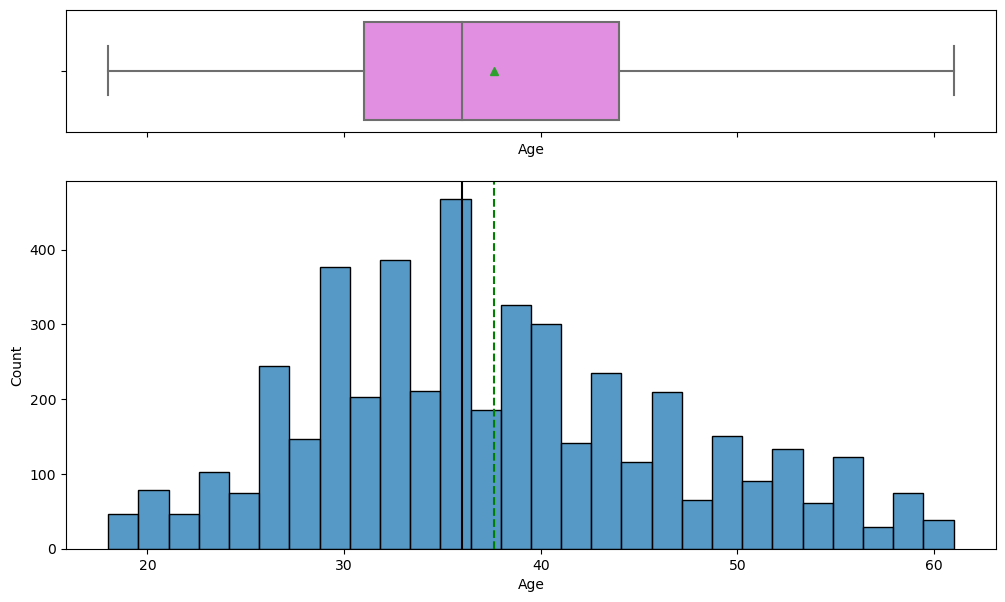

In [77]:
histogram_boxplot(df, "Age")

- This distribution looks normal.
- There is no outliers

##### Observation on Durationofpitch column

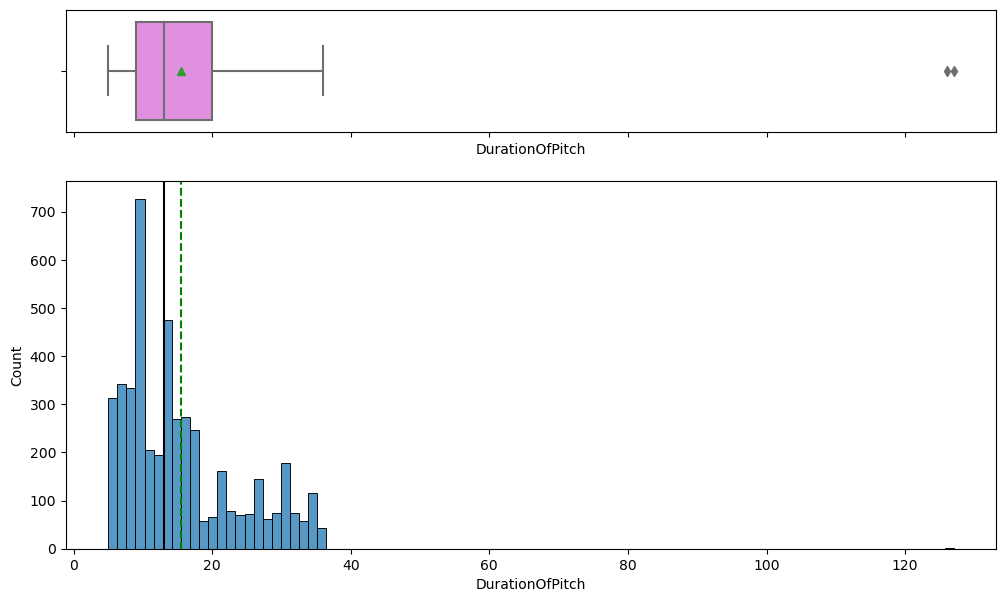

In [78]:
histogram_boxplot(df, "DurationOfPitch")

- There are most data in range with few outliers. To my opinion, there will be insignificant impact on analysis.

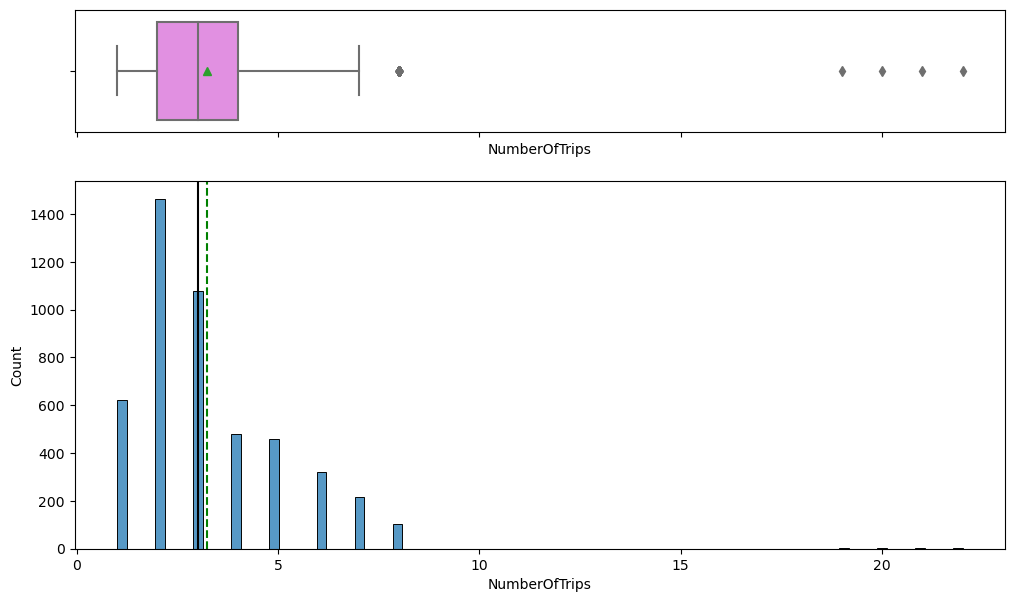

In [79]:
histogram_boxplot(df, "NumberOfTrips")

- There are also few outliers. However, the most of the data within the range.

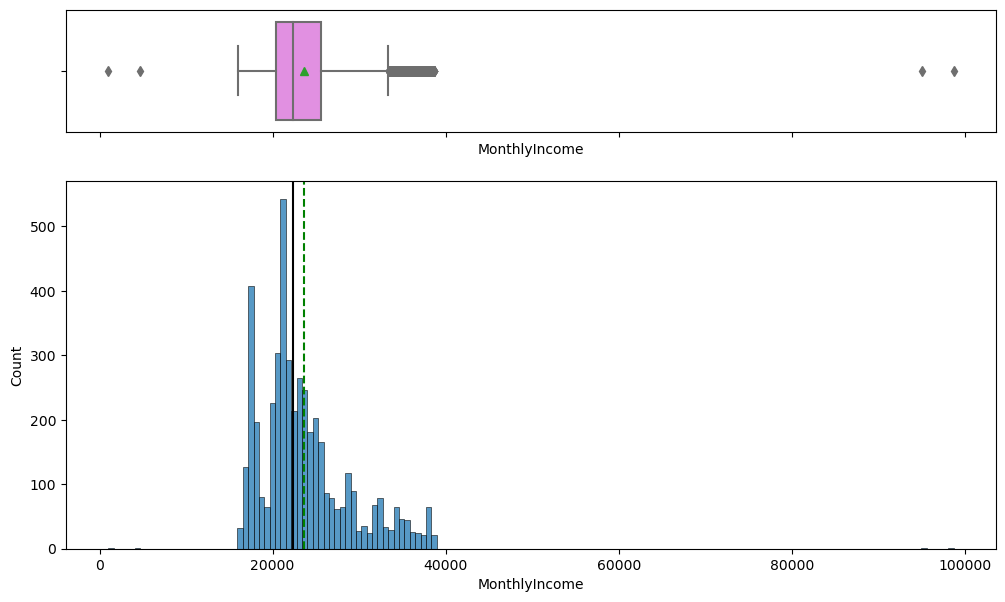

In [80]:
histogram_boxplot(df, "MonthlyIncome")

- Though there are many outliers are visible, the distribution of the data is not drastically problematic, the mean, median and mode are close with one another, centering around 20000-25000

In [81]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### Barplot of ProdTaken

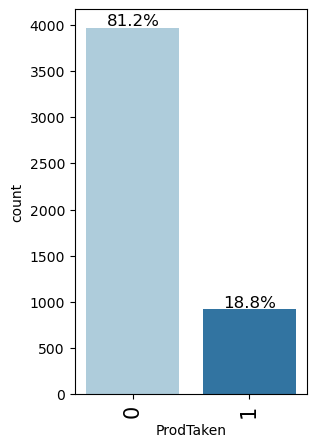

In [82]:
labeled_barplot(df, "ProdTaken", perc=True)

- There are imbalance in the data, most of them 81 Percent has not bought the product

##### Barplot of TypeofCOntact

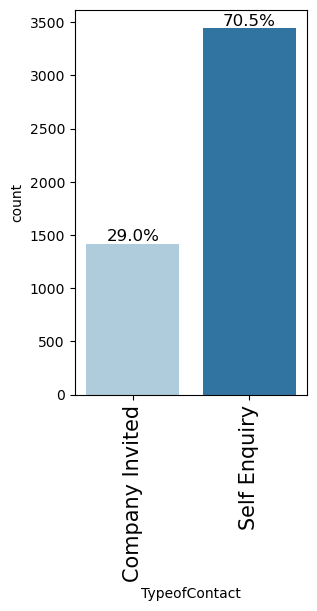

In [83]:
labeled_barplot(df, "TypeofContact", perc=True)

- Most of the quiry, 70 Percent came from Self Enquiry

##### Barplot of CityTier

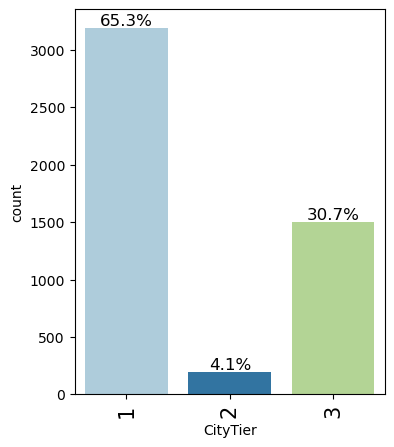

In [84]:
labeled_barplot(df, "CityTier", perc=True)

-Majority from CityTier 1 65 Percent, and very few from CityTier 2

##### Barplot of Occupation

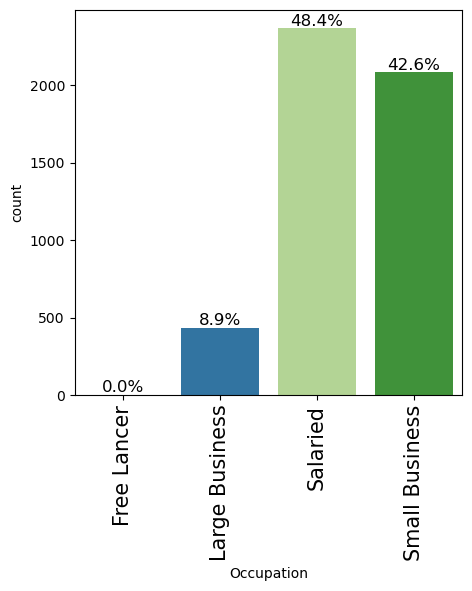

In [85]:
labeled_barplot(df, "Occupation", perc=True)

- Respondents came from mainly from Salaried and Small Business categories

##### Barplot of Gender

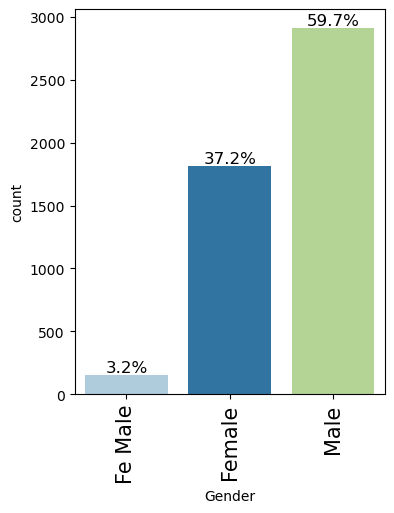

In [86]:
labeled_barplot(df, "Gender", perc=True)

- Male is the biggest category with 60 Percent

##### Barplot of ProductPitched

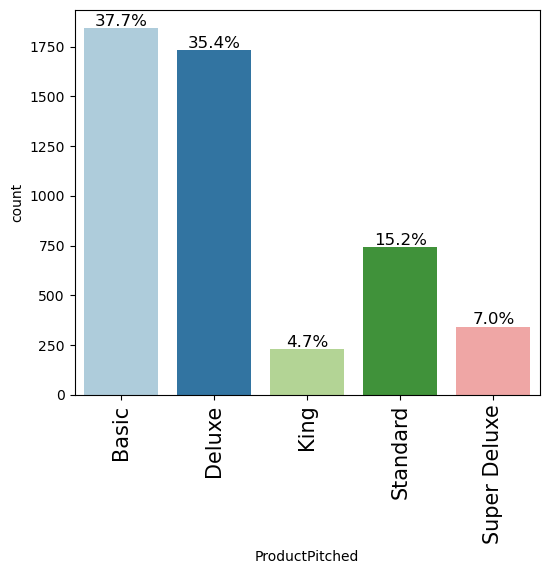

In [87]:
labeled_barplot(df, "ProductPitched", perc=True)

- Basic and Delux, these two categories of product Picthed by the sales person

##### Barplot of PreferredPropertyStar

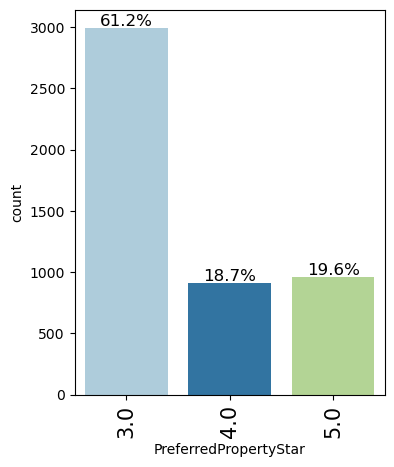

In [89]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

- Mostly 3 Star property are preferred by the 61 percent of respondents

##### Barplot of MaritalStatus

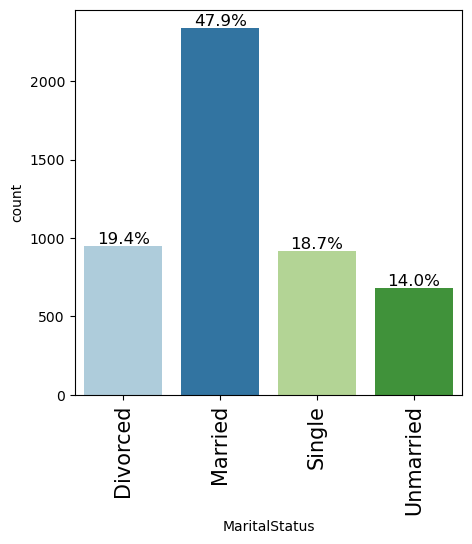

In [90]:
labeled_barplot(df, "MaritalStatus", perc=True)

- 48 Percent of are married

##### Barplot of Passport

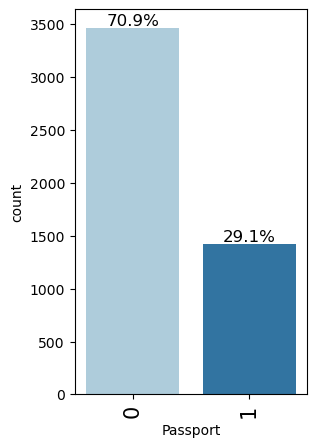

In [91]:
labeled_barplot(df, "Passport", perc=True)

- 30 percent have passport

##### Barplot of PitchSatisfactionScore

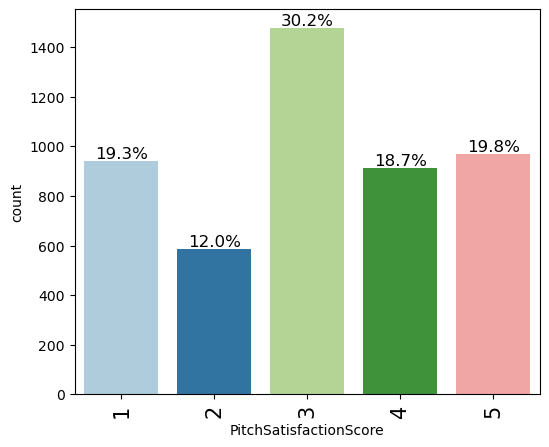

In [92]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

- Modearate is highest percentage with 30.2 percent. 

##### Barplot of NumberofFOlowups

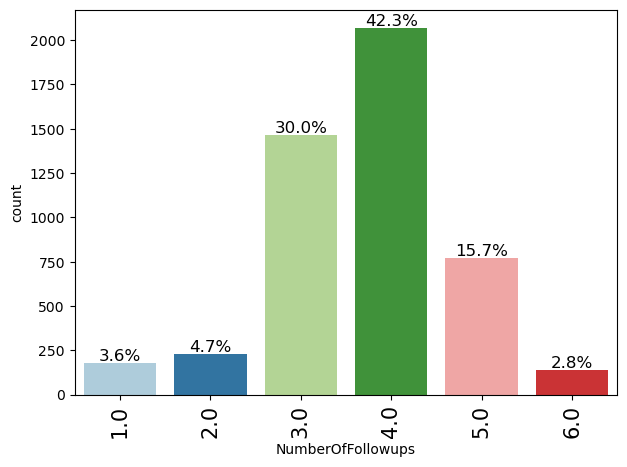

In [93]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

- In major cases, 4 is the higher number of followups done by the salesperson 

##### Barplot of NumberOfChildrenVisiting

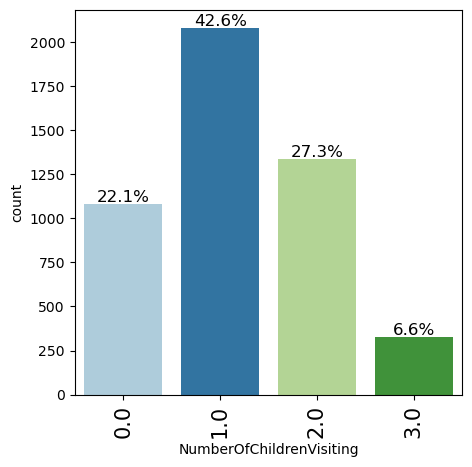

In [94]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

- Most of them are with 1 child with 42 percent. 

##### Barplot of NumberOfTrips

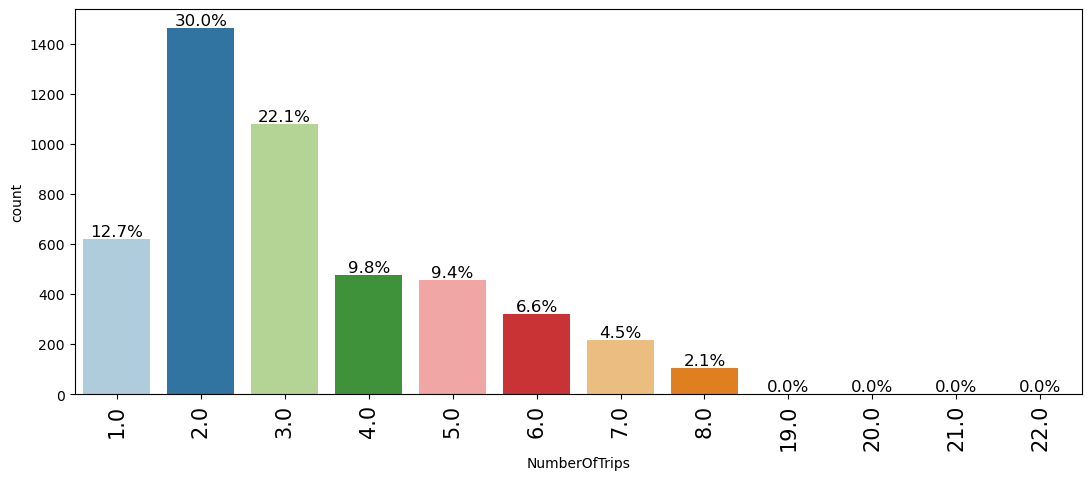

In [95]:
labeled_barplot(df, "NumberOfTrips", perc=True)

- Averagly, the customer have 2 trips in a year by 30 percent.
- There are outliers, who have more than 20 visits, they are non significant in percentage, as it was assumed.

##### Barplot of NumberOfPersonVisiting

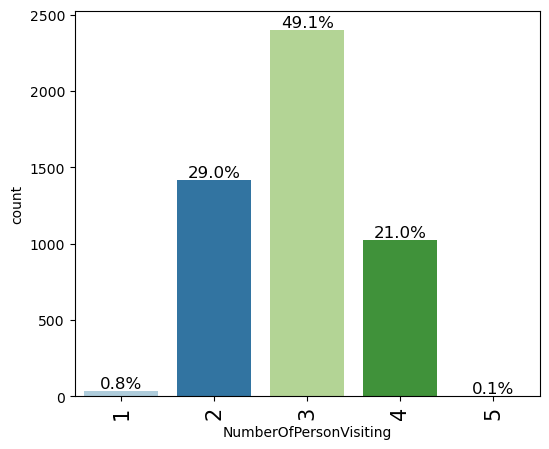

In [96]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

- On average, 3 person is the most common size with 49 percent

##### Barplot of Owncar

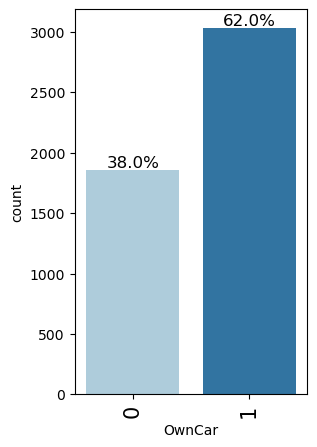

In [97]:
labeled_barplot(df, "OwnCar", perc=True)

- 62 Percent have own car

##### Barplot of Designation

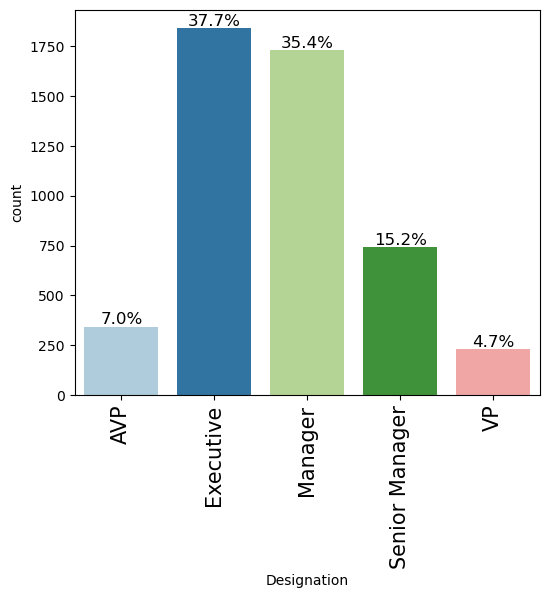

In [98]:
labeled_barplot(df, "Designation", perc=True)

- Executive an Manager are the major categories, with 38 and 35 Percent respectively

# Bivariate Analysis

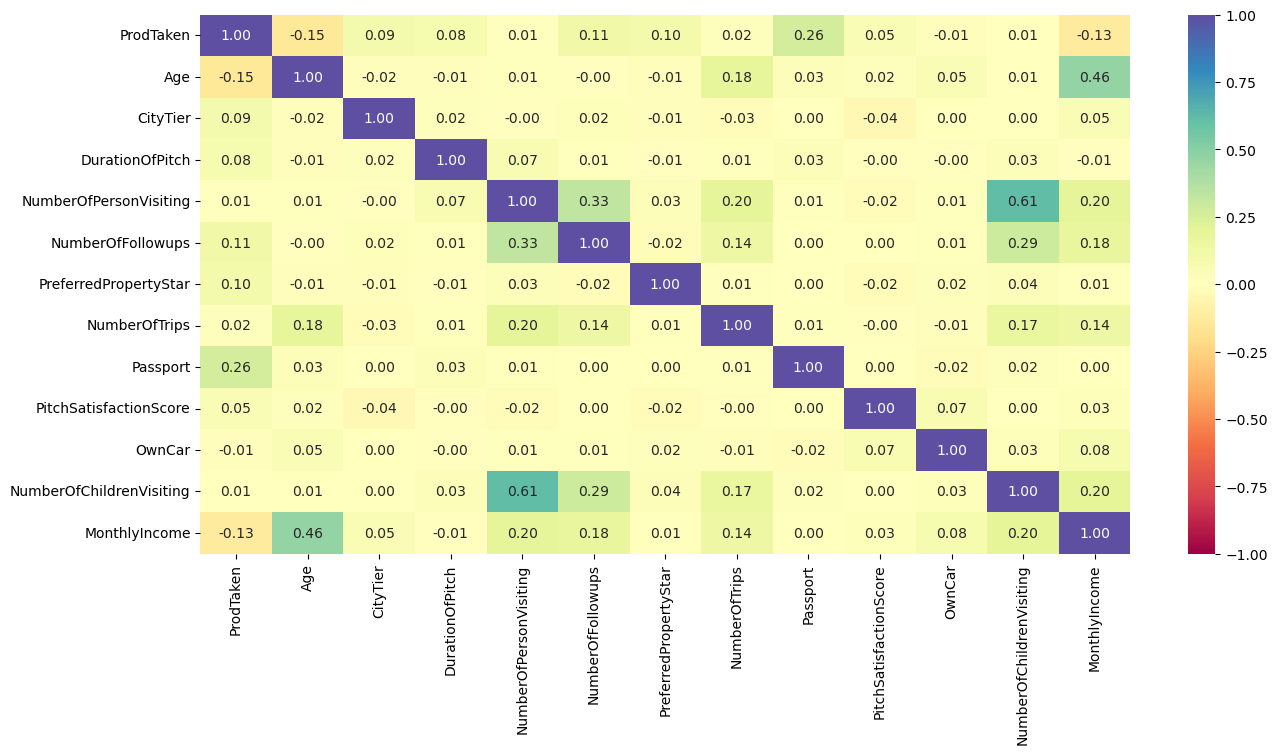

In [99]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

** In general, variables are not highly correlated with one another. There is more than average correlation between Number of Children Visiting and Number of Person Visiting. However, for a classification problem, high correlation among variables does not have a significant impact. Therefore, there is no need to drop any highly correlated variable.

In [101]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

##### Tyoeofcontact with prodtaken

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


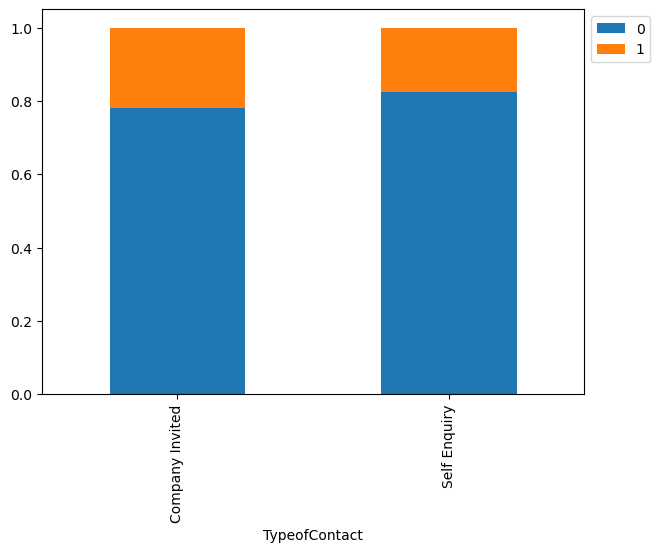

In [102]:
stacked_barplot(df, "TypeofContact", "ProdTaken")

- More prodtaken is from company invited than self enquiry

##### CityTier with Prodtaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


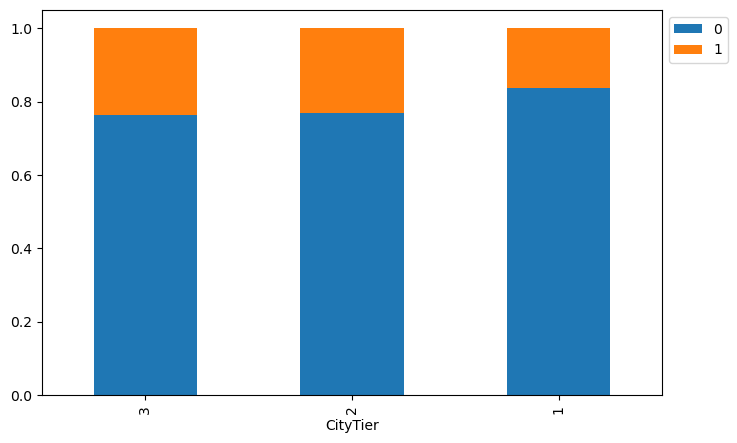

In [103]:
stacked_barplot(df, "CityTier", "ProdTaken")

- Citytier 3 has better percentage to buy the product

##### Gender with Prodtaken

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1500  317  1817
Fe Male     130   25   155
------------------------------------------------------------------------------------------------------------------------


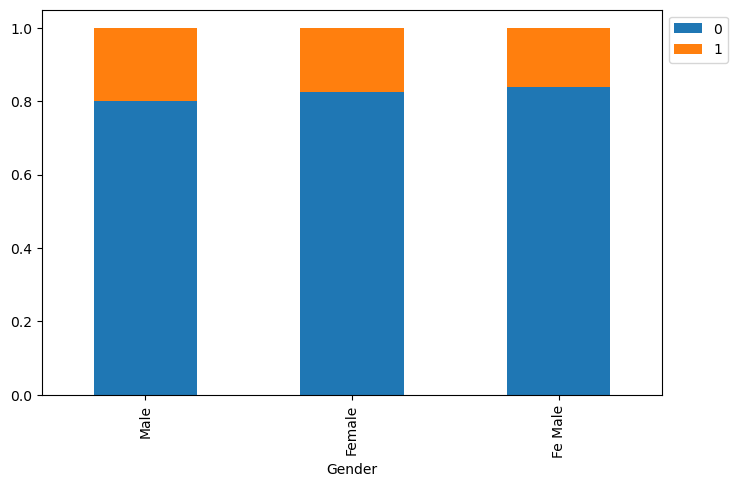

In [104]:
stacked_barplot(df, "Gender", "ProdTaken")

- Male have more product bought than female

##### Occupation with Prodtaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


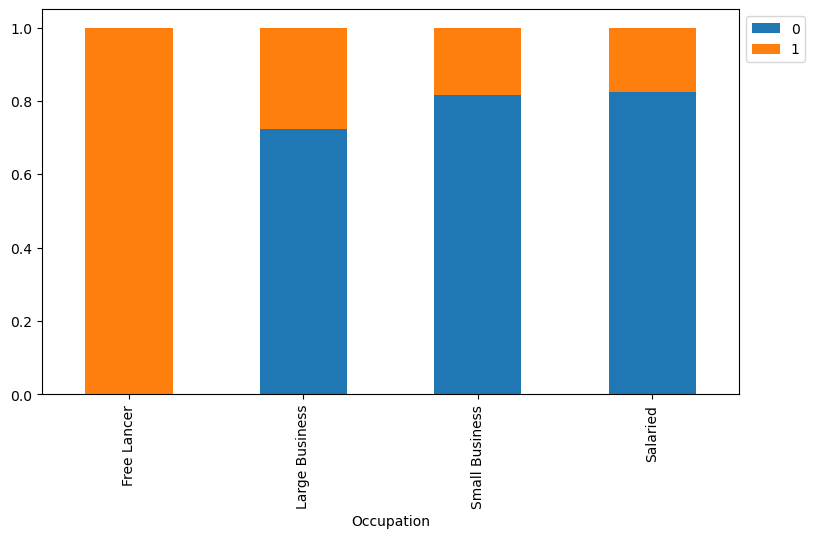

In [105]:
stacked_barplot(df, "Occupation", "ProdTaken")

- Though the Free lance looks very lucrative, as they are 100 percent bought, however they are not representative, as they are only 2 samples.
- Large Business have bought more product than other categories

##### Numberofpersonvisiting with Prodtaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


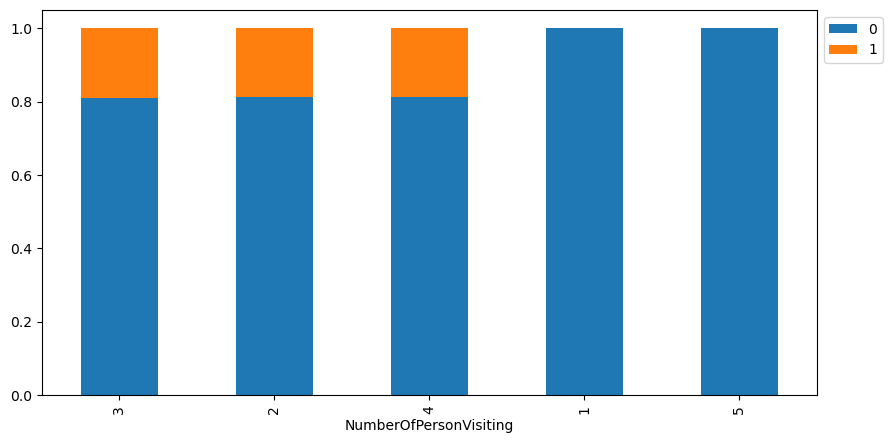

In [106]:
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken")

- 3, 4 and 5 persons are visiting almost have the similar reponse. However, 5 person are visiting nonrepresentative, as they are only 3 among all data.

##### NUmberoffollowups with Prodtaken

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


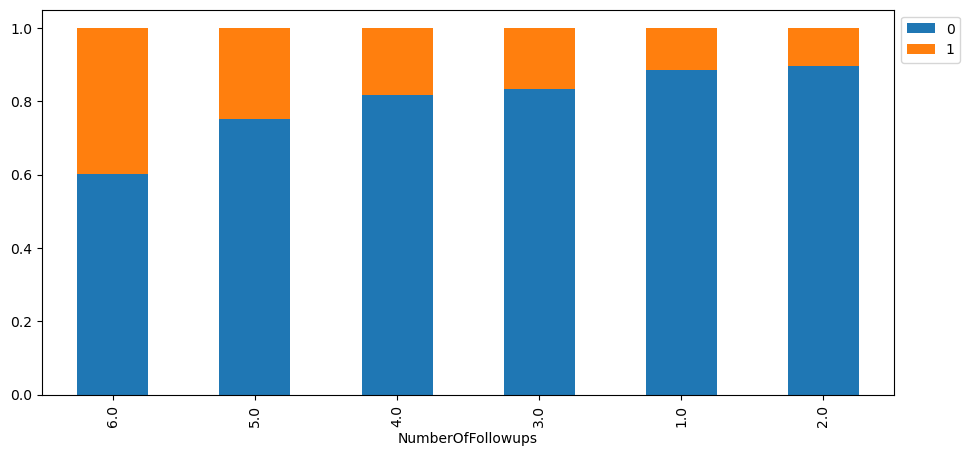

In [107]:
stacked_barplot(df, "NumberOfFollowups", "ProdTaken")

- It is visible, more followups, and more possibility to buy the product.

##### Productpitched with Prodtaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


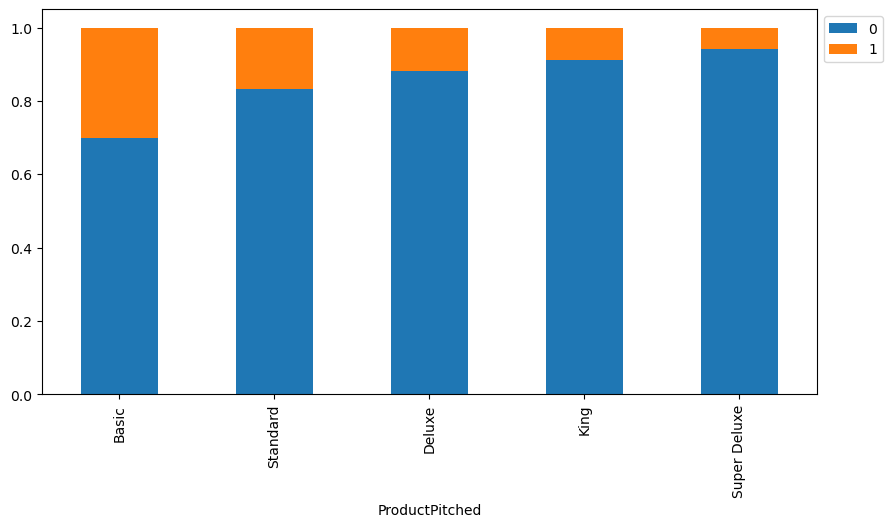

In [108]:
stacked_barplot(df, "ProductPitched", "ProdTaken")

- Basic is the best among all pitched product categories. 

##### PreferredPropertyStar with Prodtaken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


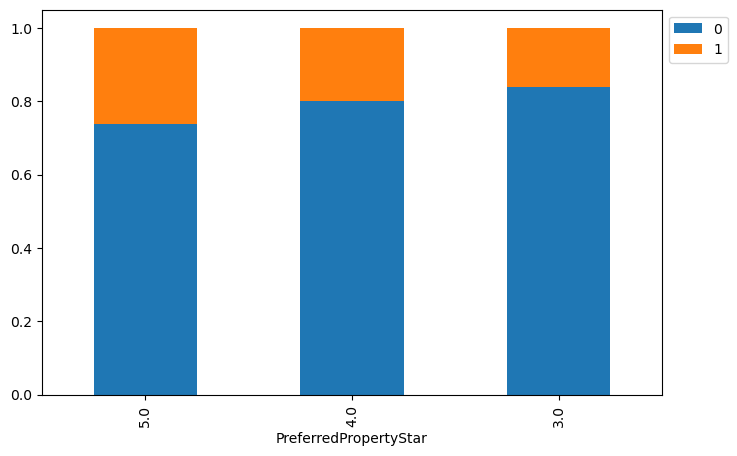

In [109]:
stacked_barplot(df, "PreferredPropertyStar", "ProdTaken")

- As preferred property star, 5 has more prospects comparitavley

##### MaritalStatus with Prodtaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


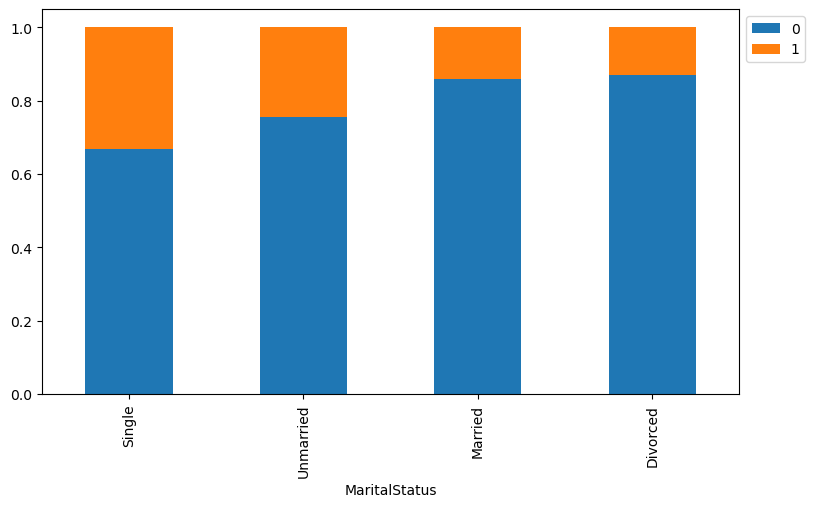

In [110]:
stacked_barplot(df, "MaritalStatus", "ProdTaken")

- Single and unmarried have better ratio to buy the product 

##### Numberoftrips with prodtaken

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


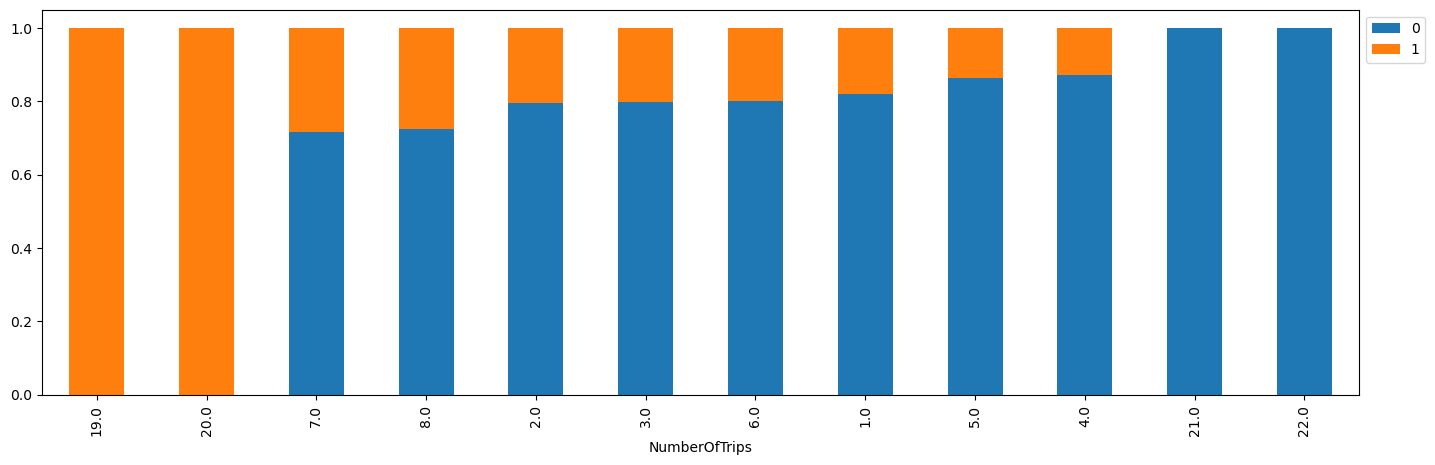

In [111]:
stacked_barplot(df, "NumberOfTrips", "ProdTaken")

- Generally, data tends to, who has taken more trip, buy more products, however, 19, 20 , they are not representative, as they are not many in number

##### Passport wit Prodtaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


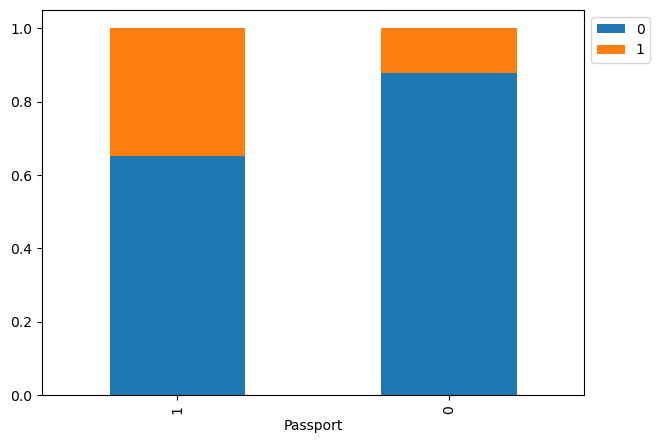

In [112]:
stacked_barplot(df, "Passport", "ProdTaken")

- it shows, that who have passport, has more chance to buy the product

##### Pitchsatisfactioscore with prodtaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


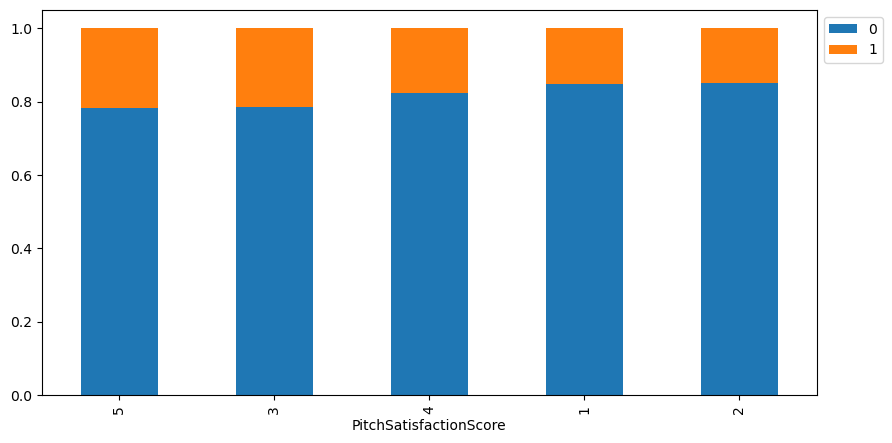

In [113]:
stacked_barplot(df, "PitchSatisfactionScore", "ProdTaken")

- there is also clear indication, who has better satisfaction score, more prone to buy

##### Own Car with Prodtaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


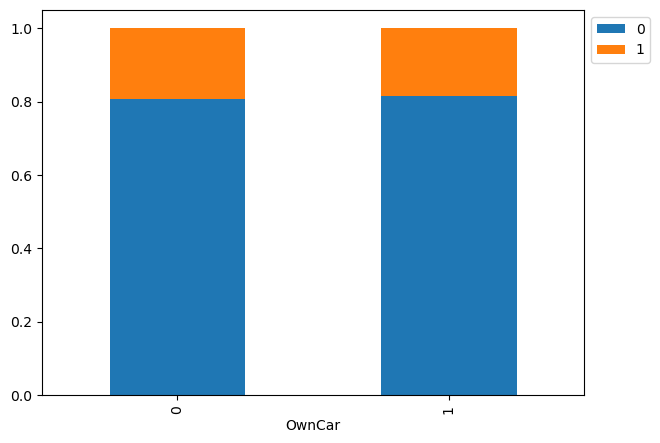

In [114]:
stacked_barplot(df, "OwnCar", "ProdTaken")

- Both categories are almost similar response. NO significant difference. 

##### Numberofchildrenvisiting with prodtaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


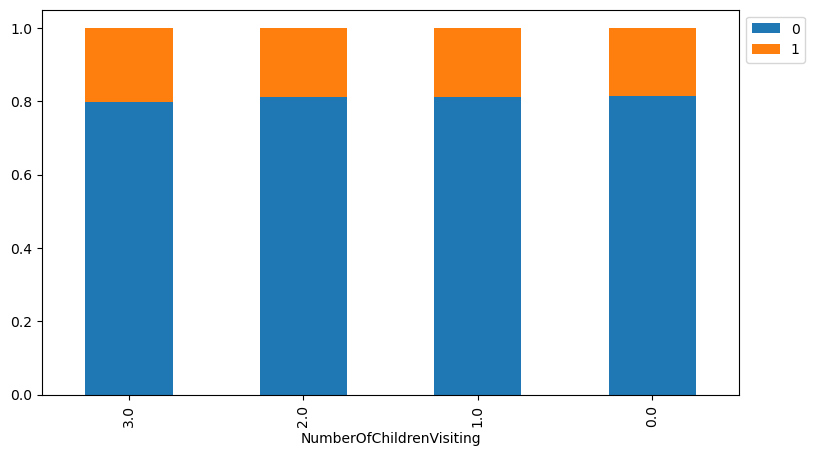

In [115]:
stacked_barplot(df, "NumberOfChildrenVisiting", "ProdTaken")

- almost very similar throughout all categories, the number of children visiting. 

##### Designation with prodtaken

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


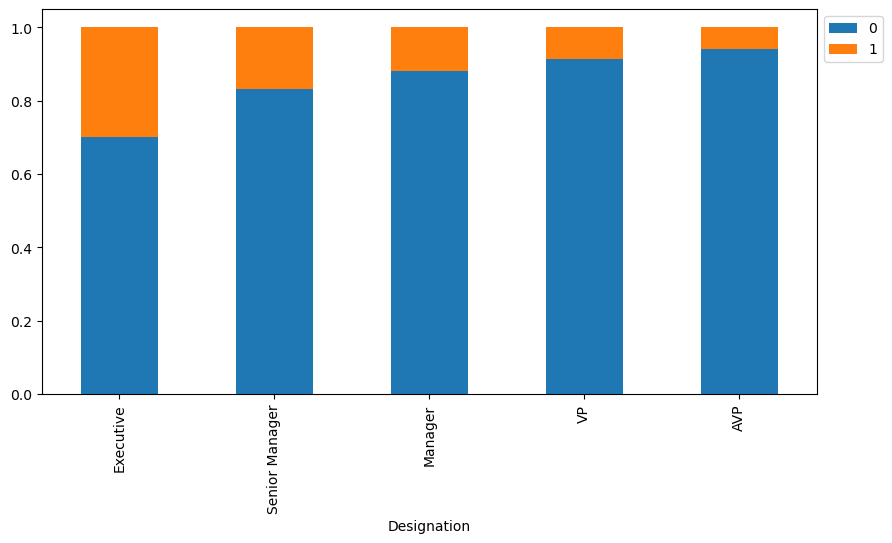

In [116]:
stacked_barplot(df, "Designation", "ProdTaken")

- Interestingly, executives have bought product more than the other categories.

# Summary of the findings from the EDA

**Observations from Univariate Analysis:**

- The data looks almost normal.
- There is no significant difference between the highest and lowest values, except for Monthly Income and the number of trips in the year.
- Some features have missing values; however, the percentage in comparison to the total number of observations is nonsignificant, only 5 percent.
- The distribution of age is normal, with the mean age falling between 37 and 38, which is an ideal age for traveling from both a financial and physical fitness perspective.
- On average, 4 follow-ups are made with customers.
- Most contacts are initiated by customers rather than the company.
- Only 18 percent of people have bought the product among all respondents.
- 65 percent of respondents are from City Tier 1.
- Only 30 percent have a passport.
- 48 percent of respondents are married.
- 30 percent have made 2 visits per year, the highest percentage from the data.
- Property star 3 is mostly chosen as the preferred property star by respondents.

**Observations from Bivariate Analysis:**

- In correlation, there is a moderate correlation between age and monthly income. Also, there is a relation between the number of persons visiting and the number of children visiting.
- Males are more prone to buy the product than females; however, the difference is not high.
- Mostly, people bought the product when the company made the contact.
- People from City Tier 3 have responded more positively than others.
- Single and unmarried people are more prone to buy the product, as they can make quick decisions to travel compared to those who have families.
- Basic product categories have more appeal to customers.
- The number of follow-ups has a significant impact on making the decision to buy the product; more follow-ups have influenced customers to make the purchase.
- However, pitch quality is not so good, as indicated by the satisfaction score; mostly, respondents have selected the neutral option.
- Having one's car does not have any impact on the possibility of buying the product.
- Having a passport increases the possibility to visit and, thus, to buy the travel product.
- People who visit more in a year have a higher possibility of buying the product.
- In the case of the number of children, that does not vary based on the number of children visiting.
- Executives in the category of occupation have a higher possibility of buying the product.

# Preparing the Data

In [119]:
#Converting the object categories into categorical
for feature in df.columns:
    if tourb[feature].dtype == "object":
        tourb[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [120]:
# Converting the other categories, which have datatype as integer
cat_columns=[
    "ProdTaken",
    "CityTier",
    "PreferredPropertyStar",
    "Passport",
    "PitchSatisfactionScore",
    "OwnCar"    
]

In [121]:
df[cat_columns]=df[cat_columns].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   object  
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   object  
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   object  
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   object  
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [123]:
#Encoding the categorical values
replacestruct = {
    "TypeofContact": {"Self Enquiry": 1, "Company Invited": 2},
    "Gender": {"Male": 1, "Female": 2, "Fe Male": 3},
    "Occupation": {"Salaried": 1, "Small Business": 2, "Large Business": 3, "Free Lancer": 4},
    "ProductPitched": {"Basic": 1, "Deluxe": 2, "Standard": 3, "Super Deluxe": 4, "King": 5},
    "MaritalStatus": {"Married": 1, "Divorced": 2, "Single": 3, "Unmarried": 4},
    "Designation": {"Executive": 1, "Manager": 2, "Senior Manager": 3, "AVP": 4, "VP": 5}
}
df=df.replace(replacestruct)

#### Dealing with Missing Values, Imputation
- For the categorical variables, with mode, missing values are imputed
- For the numerical variables, with mean are generally selected
- However, where the continous variables are discrete in nature, for example, number of children are visiting, number of followups, also mode is chosen as imputation technique

In [126]:
#Typeofcontact missing values are imputed with mode
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

In [127]:
#Incase of Age, mean is selected to impute
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [128]:
#Duration of pitch also imputed with mean
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean())

In [129]:
#Number of followups imputed with mean
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean())

In [130]:
#Preferredpropertystar is imputed with mode
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])

In [131]:
#Number of trips is imputes with mode
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0])

In [132]:
#Number of Children Visiting also imputed with mode
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])

In [133]:
#Though there are outliers, few of them very large in number. However as the mean, mode and median are almost very close, the mean is chosen to impute
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

In [134]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- There are no missing values

# Building the Model

In [135]:
# X and Y are declared
X = df.drop("ProdTaken" , axis=1)
y = df.pop("ProdTaken")

In [136]:
#Data are divided into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [137]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### - Which will be the best score?

Objective:

The primary goal is to optimize the model for customer acquisition while minimizing marketing costs. The focus is on precision, specifically reducing the number of false positives. Simultaneously, there is an emphasis on achieving a balanced performance, as indicated by the F1 score, to strike a balance between precision and recall. The primary objective is to maximize true positives, identifying genuine customers, while minimizing false positives to ensure efficient allocation of marketing budget. Precision is the key metric, with consideration for a harmonious balance between precision and recall indicated by the F1 score.

In [138]:
#Function to create different metrics score
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #f1 score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# Bagging

In [139]:
#base_estimator.  Here, decision tree by default as bagging classifier
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [140]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.9107021131561008
Recall on training set :  0.9736024844720497
Recall on test set :  0.6014492753623188
Precision on training set :  1.0
Precision on test set :  0.8877005347593583
f1 on training set :  0.9866247049567269
f1 on test set :  0.717062634989201


- Precsion on train data has overfitted
- There is huge difference between f1 train and test score, as well as on recall also

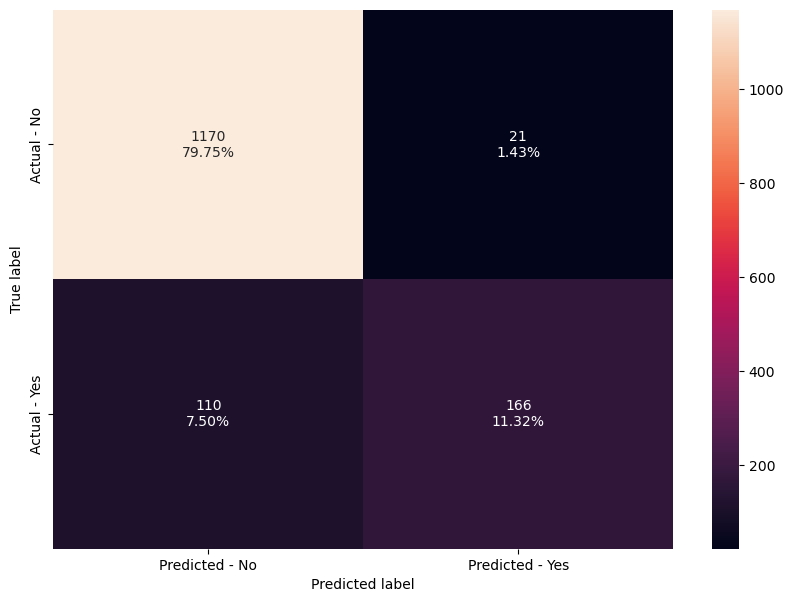

In [142]:
#confusion matrix of bagging
make_confusion_matrix(bagging_estimator,y_test)

##### Logistic Regression as a base estimator for bagging classifier

In [143]:
#Logistic Regression as a base estimator for bagging classifier

In [144]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [145]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8146740719087986
Accuracy on test set :  0.8159509202453987
Recall on training set :  0.017080745341614908
Recall on test set :  0.028985507246376812
Precision on training set :  0.9166666666666666
Precision on test set :  0.8
f1 on training set :  0.03353658536585366
f1 on test set :  0.055944055944055944


- Accuracy and precision score has improve significantly
- however recall and f1 are doing very poor
- In confusion matrix, model is able to reduce the number of false positive significantly

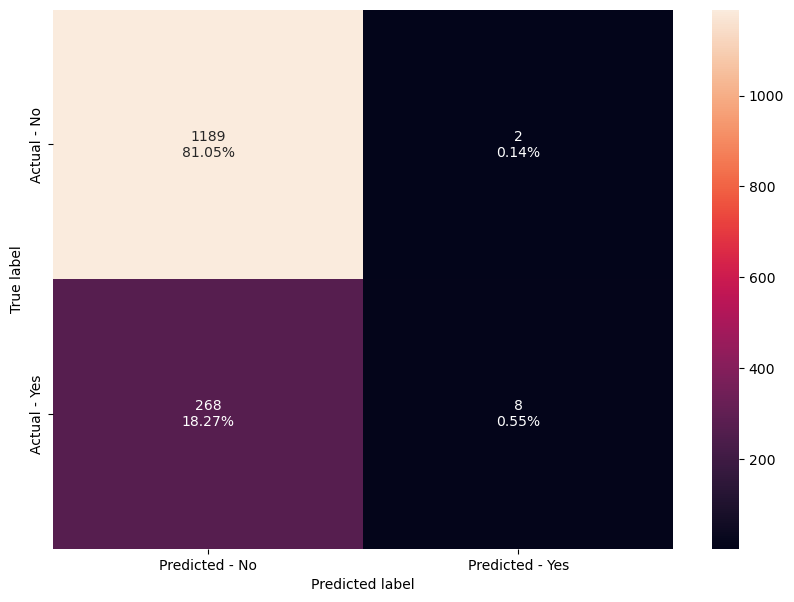

In [146]:
#confusion matrix on lr
make_confusion_matrix(bagging_lr,y_test)

##### Bagging classifier tuned

In [147]:
#Bagging classifier tuned
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Running the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [149]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9297886843899114
Recall on training set :  0.9968944099378882
Recall on test set :  0.6702898550724637
Precision on training set :  1.0
Precision on test set :  0.9390862944162437
f1 on training set :  0.9984447900466563
f1 on test set :  0.7822410147991543


- still model is suffering from overfitting in accuracy, recall on train data
- f1 also on train data, though the gap between train and test is reduced and overall the score has improved
- precision also suffering from overfitting
- in cm numer of false positive increased

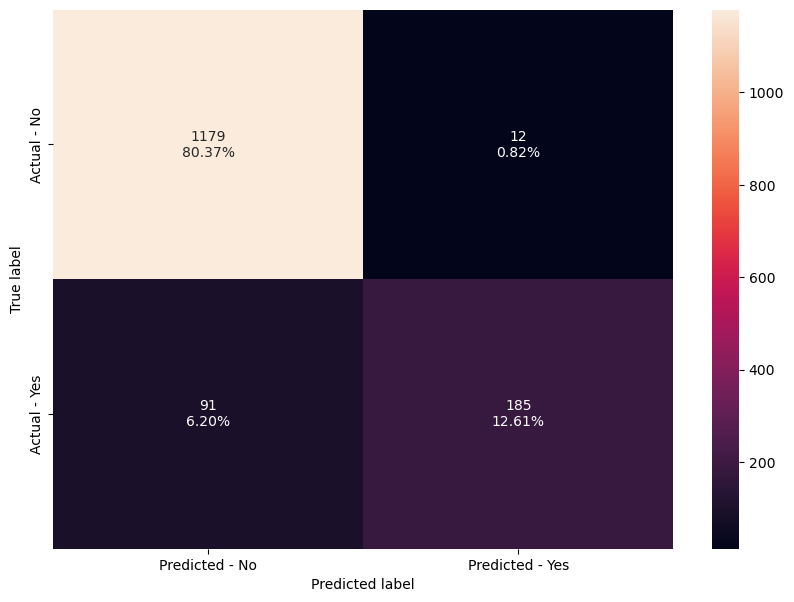

In [150]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

##### Random Forest Classifier

In [151]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [152]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9250170415814588
Recall on training set :  1.0
Recall on test set :  0.6485507246376812
Precision on training set :  1.0
Precision on test set :  0.9322916666666666
f1 on training set :  1.0
f1 on test set :  0.764957264957265


- in all metrics, train data is suffering from overfitting
- in cm, false positive has not improved

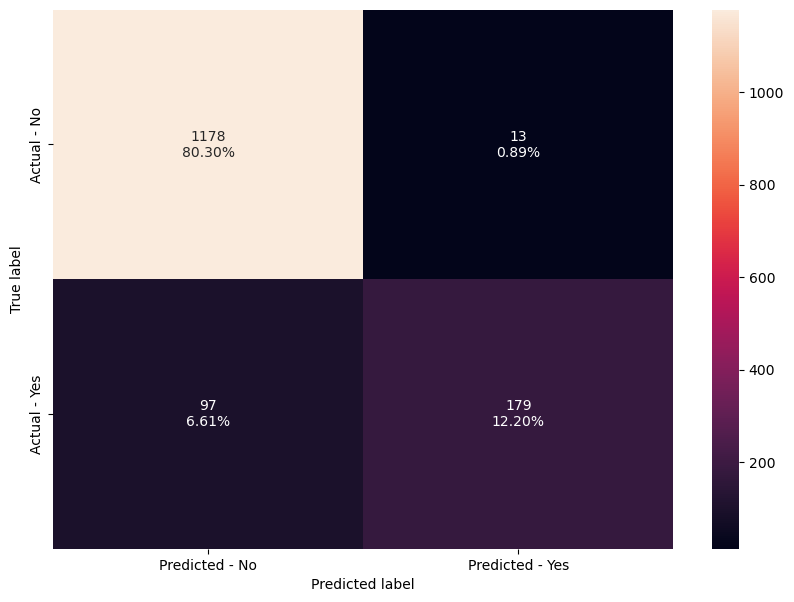

In [153]:
make_confusion_matrix(rf_estimator,y_test)

##### Weighted Random Forest

In [156]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)             

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=6,
                       n_estimators=250, random_state=1)

In [157]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9245834551300789
Accuracy on test set :  0.8841172460804363
Recall on training set :  0.7251552795031055
Recall on test set :  0.5543478260869565
Precision on training set :  0.8521897810218978
Precision on test set :  0.765
f1 on training set :  0.7835570469798656
f1 on test set :  0.6428571428571428


- Accuracy score has improved significantly
- Precision is better, however, the difference is little bit high among trian and test
- recall and f scores are not impressive
- False positive is not impressive


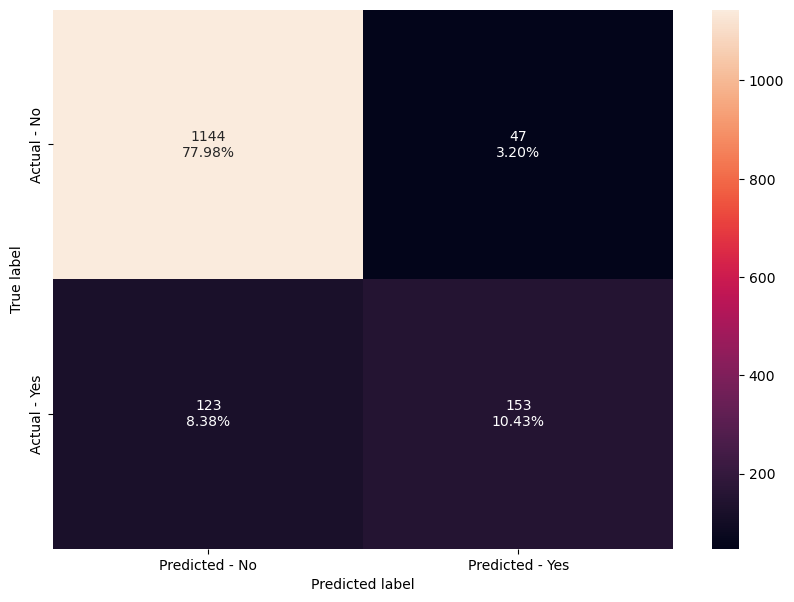

In [158]:
make_confusion_matrix(rf_estimator_weighted,y_test)

##### Random Forest Tuned

In [159]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [160]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9064600993861444
Accuracy on test set :  0.8779822767552828
Recall on training set :  0.546583850931677
Recall on test set :  0.4311594202898551
Precision on training set :  0.9263157894736842
Precision on test set :  0.8439716312056738
f1 on training set :  0.6875
f1 on test set :  0.5707434052757794


- accuracy and precision score has improved than without hypertuning
- however, the recall and f1 score is not good at all
- False positive number has increased more

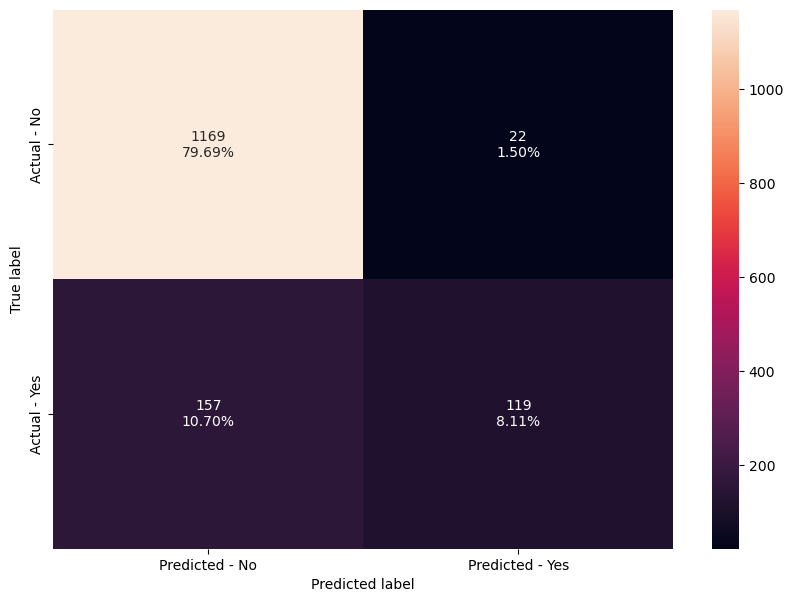

In [161]:
make_confusion_matrix(rf_estimator_tuned,y_test)

##### Feature Importance on Random Forest tuned

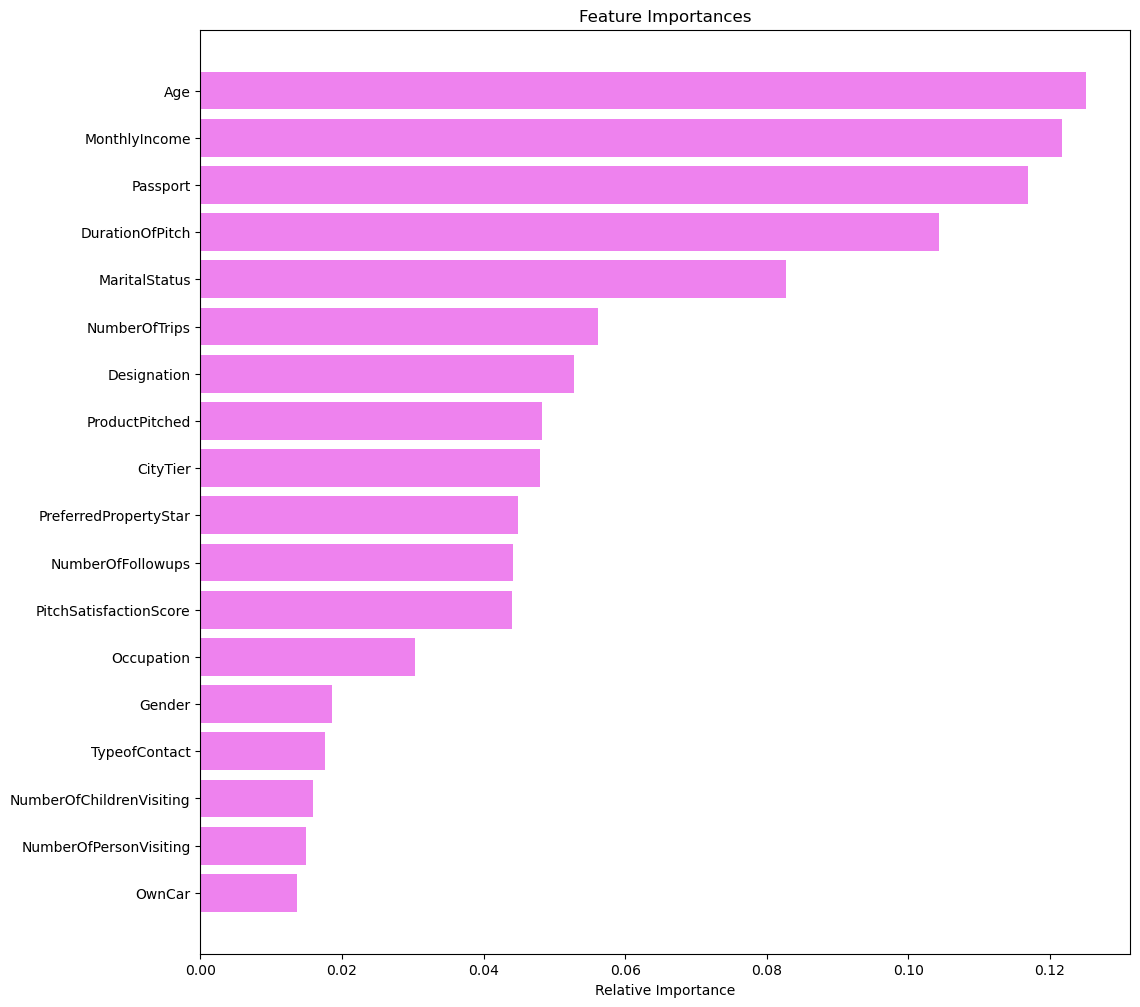

In [162]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- From Importances, we see, Age, Monthly Income, Passport, DurationofPitch and Marital Staus are significant features among all the availabel features

##### Decision Tree Classifier

In [163]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [164]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8997955010224948
Recall on training set :  1.0
Recall on test set :  0.75
Precision on training set :  1.0
Precision on test set :  0.7263157894736842
f1 on training set :  1.0
f1 on test set :  0.7379679144385027


- In all score categories, there are overfitting on the train data
- train and test score differences are high in all 
- False positive also doing really bad

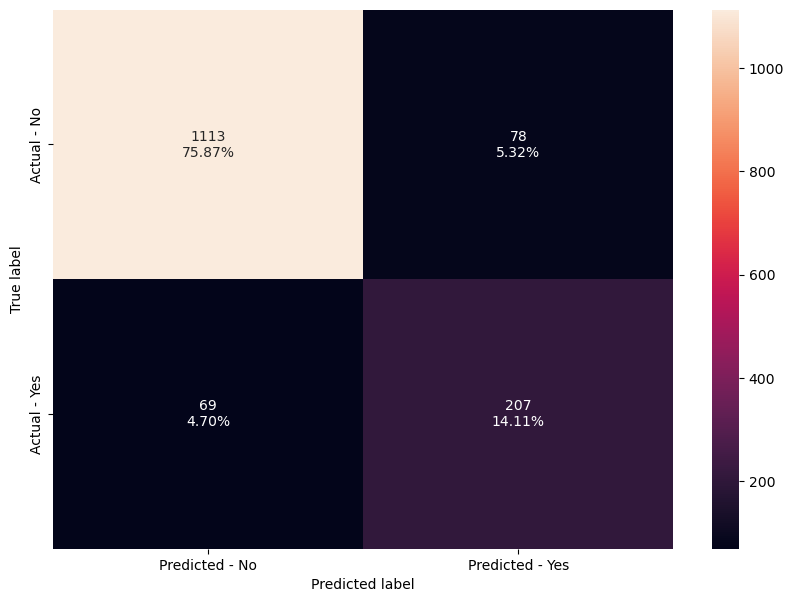

In [165]:
make_confusion_matrix(dtree,y_test)

##### Decision Tree Tuned

In [166]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=1)

In [167]:
dtree_score=get_metrics_score(dtree_tuned)

Accuracy on training set :  0.9964922537269805
Accuracy on test set :  0.8991138377641446
Recall on training set :  0.9860248447204969
Recall on test set :  0.75
Precision on training set :  0.9952978056426333
Precision on test set :  0.7237762237762237
f1 on training set :  0.9906396255850235
f1 on test set :  0.7366548042704626


- All scores nonsignificantly improved even after hypertuning
- Also false positive has not improved

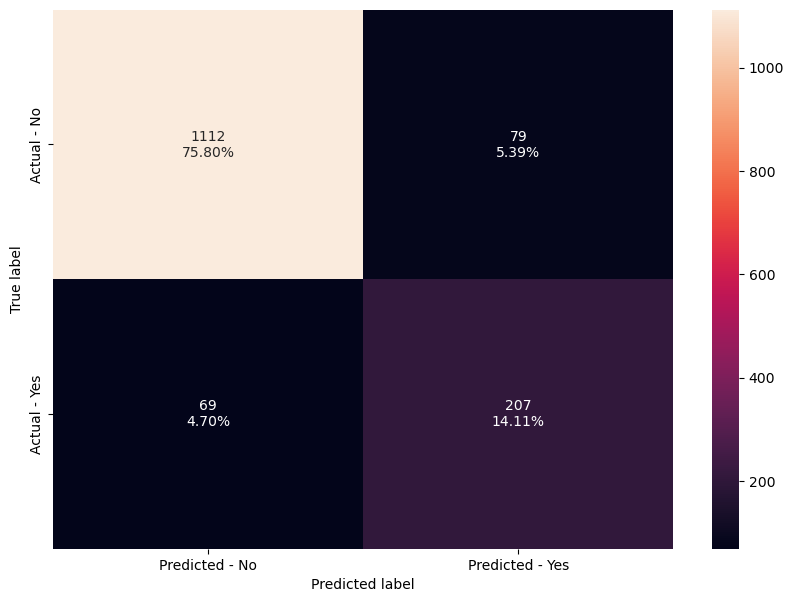

In [168]:
make_confusion_matrix(dtree_tuned, y_test)

##### Feature Importance Decision Tree

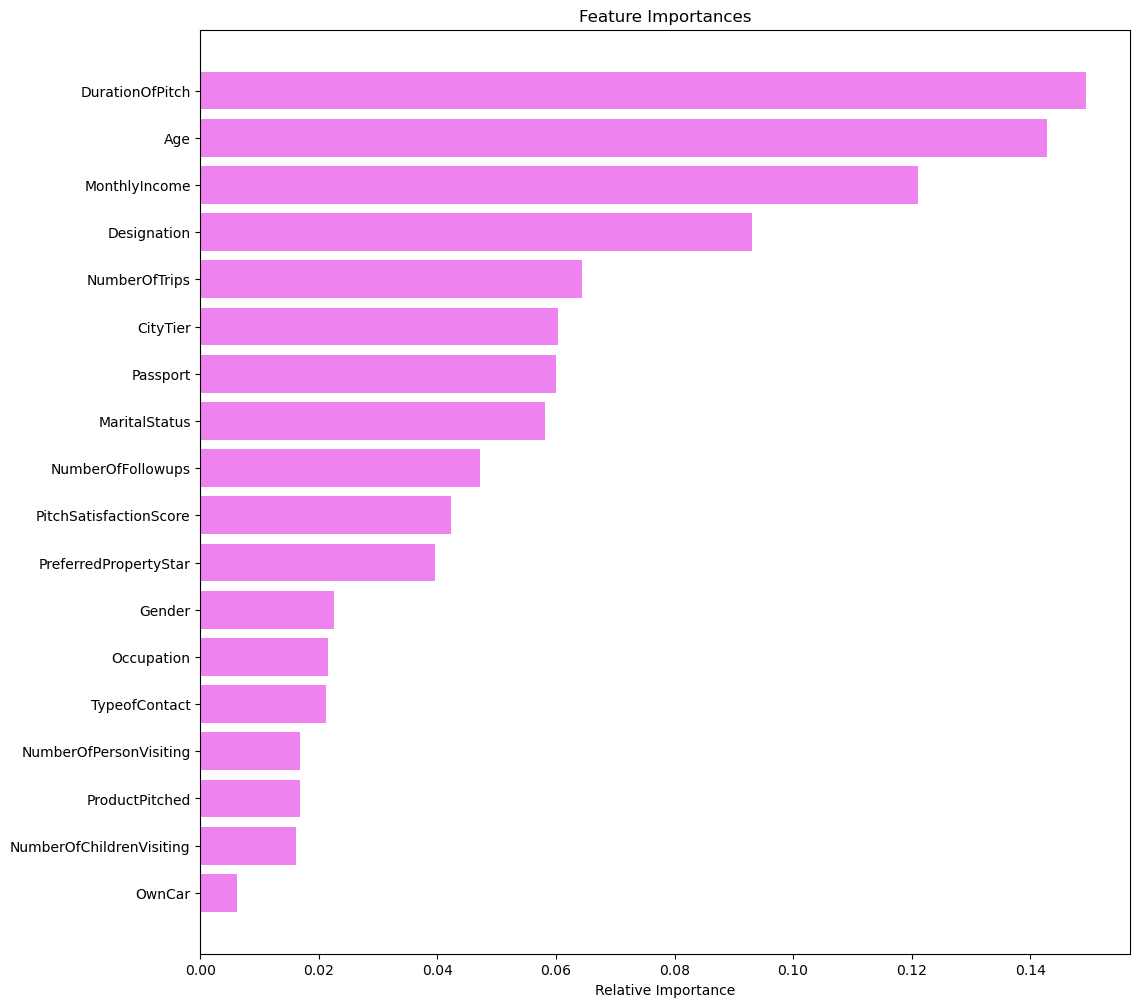

In [169]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Duration of Pitch is most important feature acording to this model
- Age, Monthly income and designation are other important features

# Boosting

##### Adaboosting

In [170]:
#Adaboosting 
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [171]:
# to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8465361005553932
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.32919254658385094
Recall on test set :  0.31521739130434784
Precision on training set :  0.6950819672131148
Precision on test set :  0.696
f1 on training set :  0.4467860906217071
f1 on test set :  0.4339152119700748


- Only the Accuracy score has improved
- Precision score has also moderately better
- the number of false positive is also decreasd moderately
- however the overall performance is not good

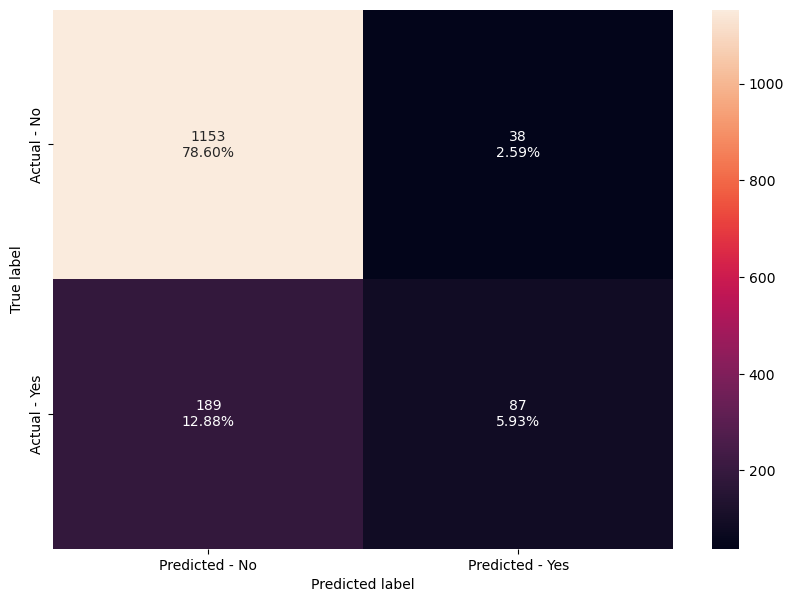

In [172]:
make_confusion_matrix(abc,y_test)

##### Adaboosting tuned

In [173]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
  
# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.2000000000000002, n_estimators=90,
                   random_state=1)

In [174]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9847997661502484
Accuracy on test set :  0.880027266530334
Recall on training set :  0.9394409937888198
Recall on test set :  0.644927536231884
Precision on training set :  0.9789644012944984
Precision on test set :  0.6953125
f1 on training set :  0.9587955625990491
f1 on test set :  0.6691729323308271


- In accuracy, the score is better
- in recall there is big difference between train and test
- there is also big difference in precision and f1 score
- in cm false positive is very poor

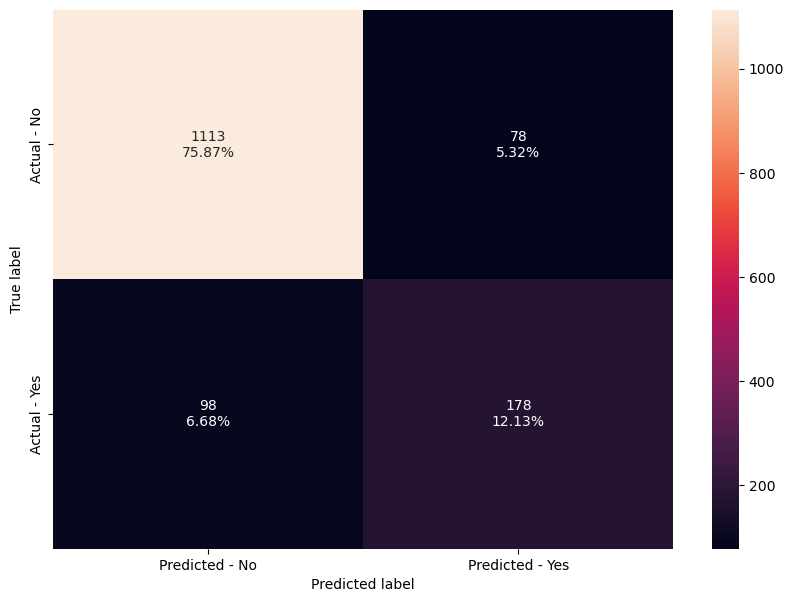

In [175]:
make_confusion_matrix(abc_tuned,y_test)

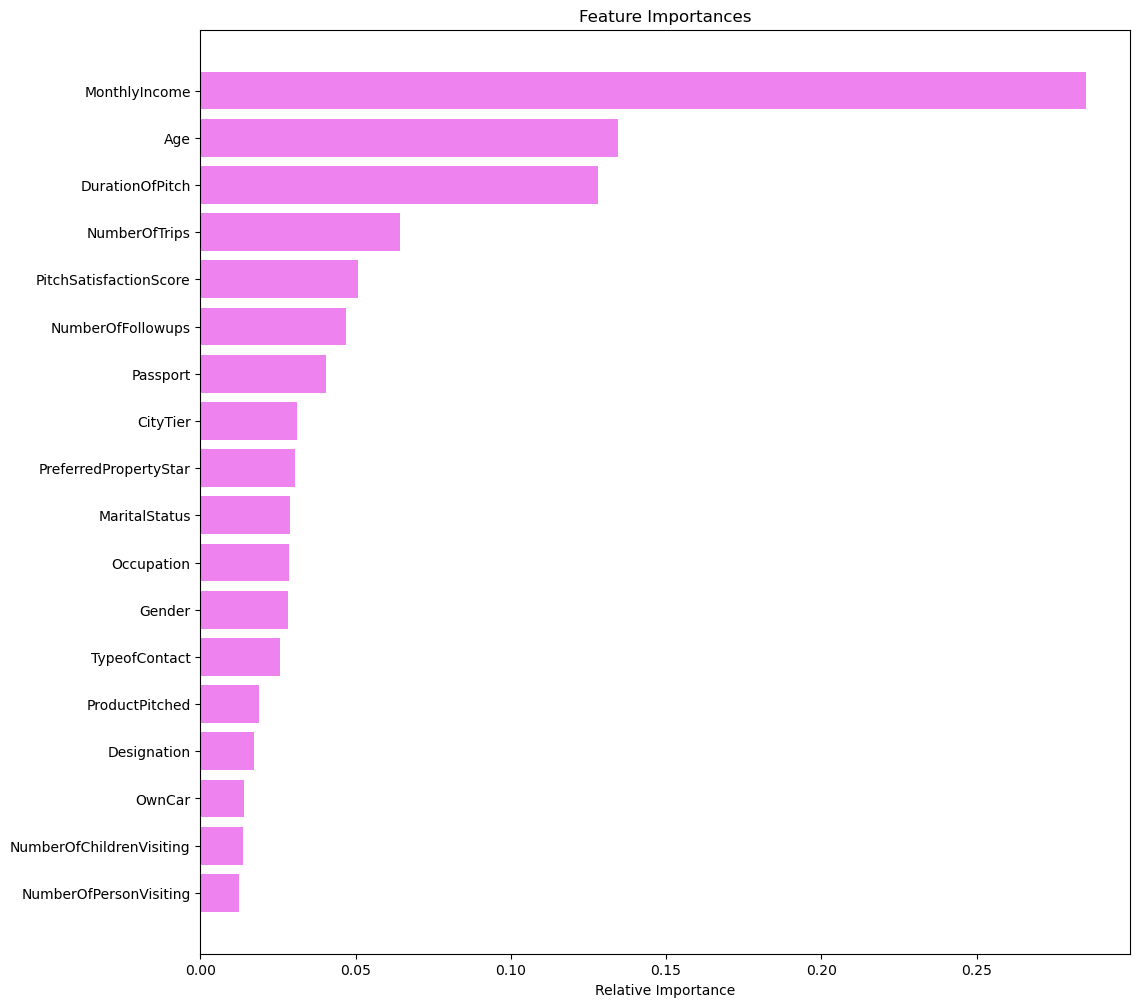

In [176]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income, Age and Duration of Pitch are the important features 

##### Gradient Boosting

In [177]:
# Performing the Gradient Boosting 
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [178]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8906752411575563
Accuracy on test set :  0.8698023176550784
Recall on training set :  0.4767080745341615
Recall on test set :  0.4057971014492754
Precision on training set :  0.8924418604651163
Precision on test set :  0.8057553956834532
f1 on training set :  0.6214574898785425
f1 on test set :  0.5397590361445784


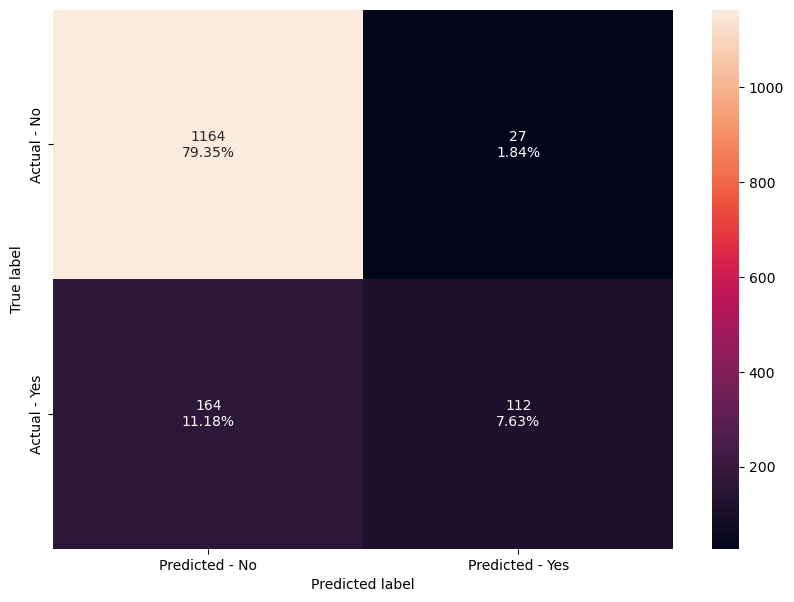

In [179]:
make_confusion_matrix(gbc,y_test)

##### Adaboosting as initial estimator for Gradient Boosting

In [180]:
#IN Gradientboosting taking adaboosting as init
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [181]:
#accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.4658385093167702
Recall on test set :  0.39855072463768115
Precision on training set :  0.8902077151335311
Precision on test set :  0.8029197080291971
f1 on training set :  0.6116207951070336
f1 on test set :  0.5326876513317191


- Accuracy and Precision are stable as well
- and the recall and f1 scores are not impressive

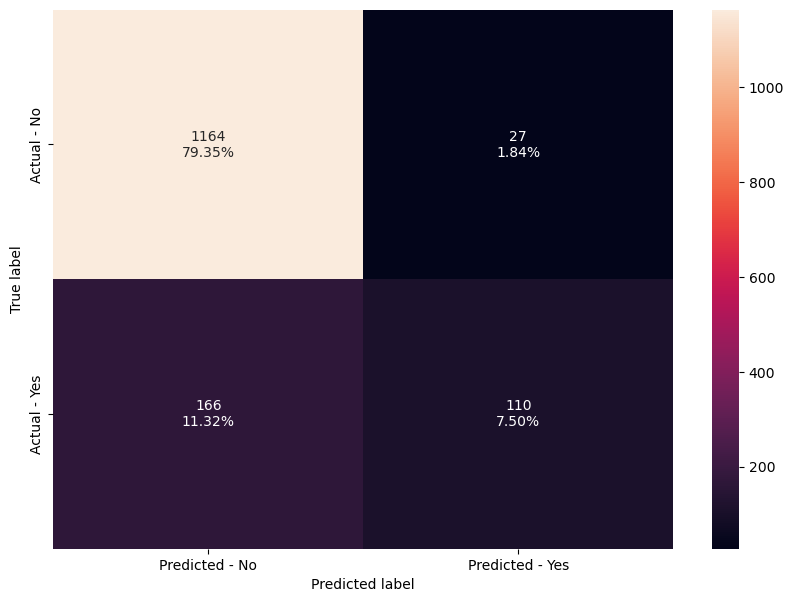

In [182]:
make_confusion_matrix(gbc_init, y_test)

##### Feature Importance Gradient with adaboosting as initial estimator

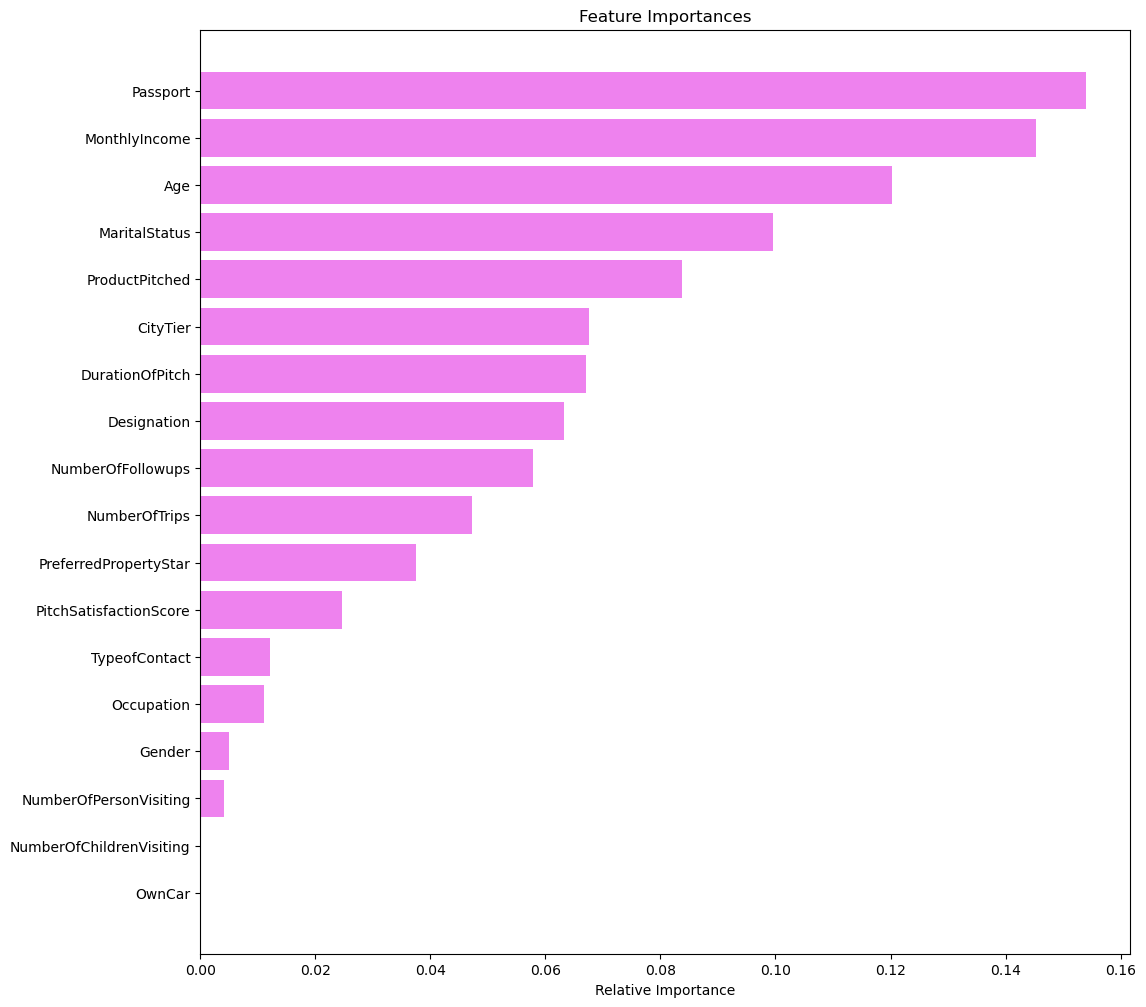

In [183]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Here interestingly Passport is the most important feature 
- MOnthly income and age are other important variables as well
- Marital Status also taken as important variable in this model

##### Gradient Boosting tuned

In [184]:
#Hypertuning  with gradient boosting
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [185]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9225372698041509
Accuracy on test set :  0.8766189502385822
Recall on training set :  0.6257763975155279
Recall on test set :  0.47101449275362317
Precision on training set :  0.9437939110070258
Precision on test set :  0.7878787878787878
f1 on training set :  0.7525676937441643
f1 on test set :  0.5895691609977324


- Accuracy as well as better
- NO changes in recall and in f1
- Precision has little bit decreased
- False Postive performence also decreased

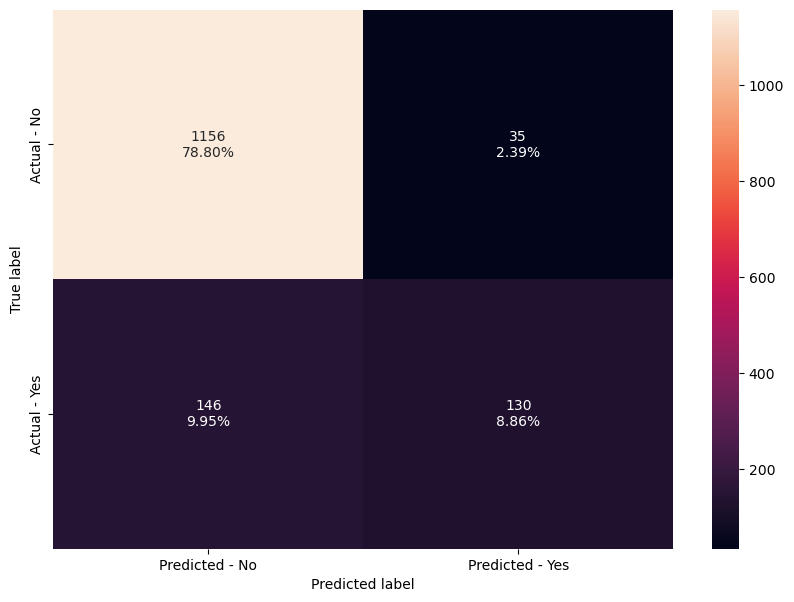

In [186]:
make_confusion_matrix(gbc_tuned,y_test)

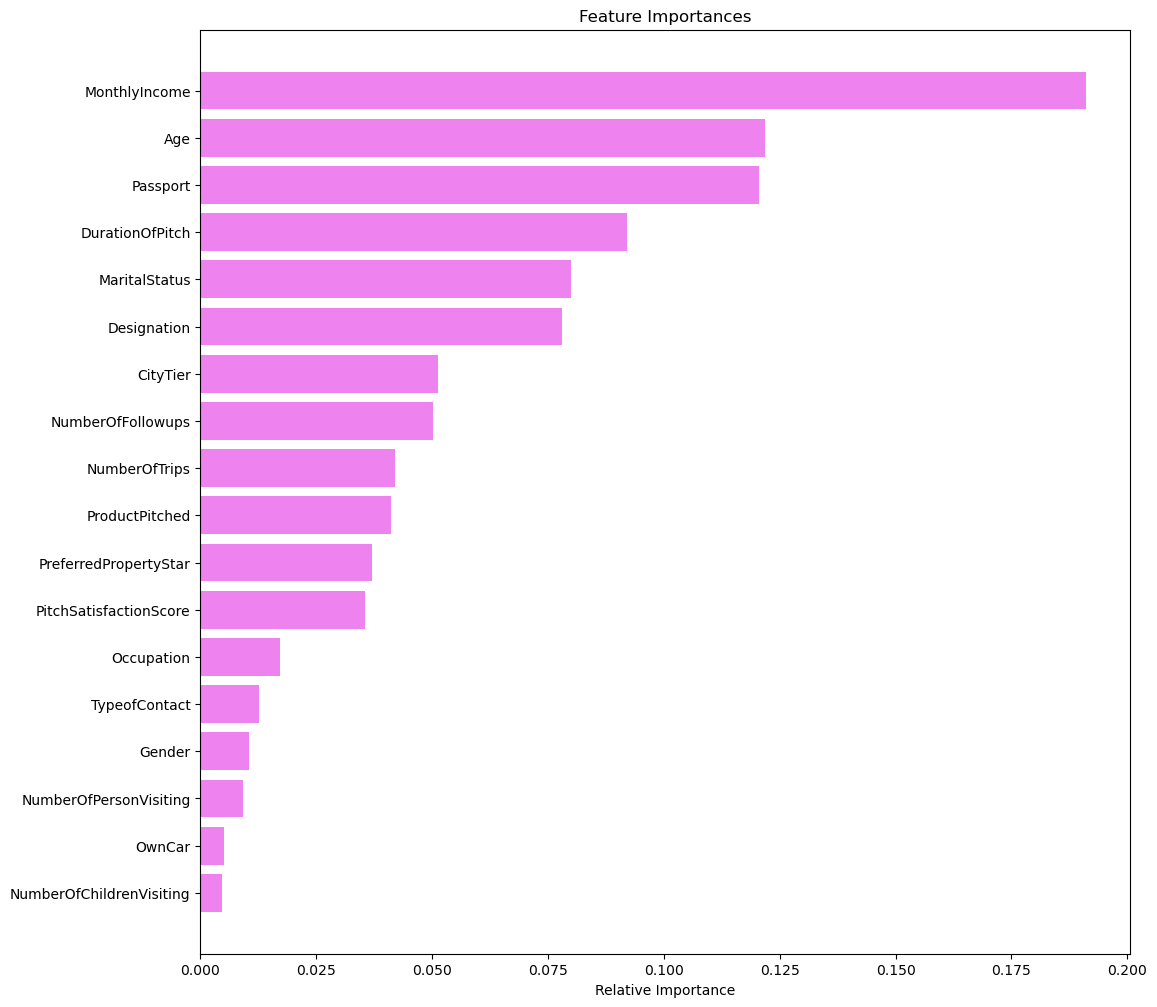

In [187]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income, Age, Passport, Duration of Pitch, Marital Status are the important variables are considered
in this model

In [189]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_weighted,rf_estimator_tuned,dtree,dtree_tuned,abc,abc_tuned, gbc,gbc_init,gbc_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [190]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters','Weighted Random Forest',
                                         'Tuned Random Forest Classifier','Decision Tree','Decision Tree Tuned','Ada Boosting','Ada Boosting Tuned','Gradient Boosting','Gradient Boosting Init','Gradient Boosting Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                        'Train_f1':f1_train,'Test_f1':f1_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1,Test_f1
0,Bagging classifier with default parameters,1.00,0.91,0.97,0.60,1.00,0.89,0.99,0.72
1,Tuned Bagging Classifier,1.00,0.93,1.00,0.67,1.00,0.94,1.00,0.78
2,Bagging classifier with base_estimator=LR,0.81,0.82,0.02,0.03,0.92,0.80,0.03,0.06
3,Random Forest with deafult parameters,1.00,0.93,1.00,0.65,1.00,0.93,1.00,0.76
4,Weighted Random Forest,0.92,0.88,0.73,0.55,0.85,0.76,0.78,0.64
5,Tuned Random Forest Classifier,0.91,0.88,0.55,0.43,0.93,0.84,0.69,0.57
6,Decision Tree,1.00,0.90,1.00,0.75,1.00,0.73,1.00,0.74
7,Decision Tree Tuned,1.00,0.90,0.99,0.75,1.00,0.72,0.99,0.74
8,Ada Boosting,0.85,0.85,0.33,0.32,0.70,0.70,0.45,0.43
9,Ada Boosting Tuned,0.98,0.88,0.94,0.64,0.98,0.70,0.96,0.67


- Gradient Boosting and Gradient Boosting INit are the best interms of precision score
- Bagging CLassifier with base estimator logistic regression, weighted random forest are other better model, giving the better score of presion test. 


### Model Performance Summary

1. **Bagging Classifier:**
   - Default: Strong training performance, significant drop in test recall and precision.
   - Tuned: Improved overall performance, maintaining high precision and recall on the test set.

2. **Bagging Classifier with LR Base Estimator:**
   - Poor performance on training recall and precision, suggesting a mismatch with the data.
   - Utilizing a Logistic Regression base estimator did not enhance the model's performance.

3. **Random Forest:**
   - Default: Excellent training accuracy, slight drop in test recall, and precision.
   - Weighted: Improved recall, but compromised precision on the test set.
   - Tuned: Balanced improvement across metrics, maintaining high precision and recall on the test set.

4. **Decision Tree:**
   - Both default and tuned versions show excellent training accuracy.
   - Slight drop in test recall, while maintaining high precision.

5. **Ada Boosting:**
   - Default: Moderate performance, particularly low recall on both training and test sets.
   - Tuned: Significant improvement in all metrics, particularly recall on the test set.

6. **Gradient Boosting:**
   - Default: Good training accuracy, drop in test recall and precision.
   - Init: Similar performance to default, no significant improvement.
   - Tuned: Balanced improvement, with notable enhancement in precision on the test set.

### Inferences:

1. **Ensemble Methods Effectiveness:**
   - Bagging and Random Forest generally perform well, especially after tuning.
   - Gradient Boosting shows potential, with tuning improving precision and recall.

2. **Base Estimator Impact:**
   - Bagging with Logistic Regression as the base estimator resulted in poor performance, suggesting a mismatch with the chosen base model.

3. **Tuning Benefits:**
   - Tuning consistently improves model performance, addressing imbalances and enhancing precision and recall.

4. **Ada Boosting Sensitivity:**
   - Ada Boosting is sensitive to parameter tuning, showing significant improvements after optimization.

5. **Precision-Recall Trade-off:**
   - Some models achieve high precision but sacrifice recall, and vice versa. Consider business priorities to choose an appropriate model.

6. **Data Suitability:**
   - The poor performance of certain models suggests a potential mismatch between the algorithms and the data distribution. Further data exploration and feature engineering might be beneficial.

### Recommendations:

1. **Consider Bagging and Random Forest:**
   - These ensemble methods show robust performance; consider them for deployment after further fine-tuning.

2. **Explore Base Estimator Options:**
   - The impact of the base estimator on Bagging suggests exploration of different base models for better alignment with the data.

3. **Prioritize Model Tuning:**
   - Given the consistent improvements seen with tuning, allocate resources to further optimization across all models.

4. **Business Context Consideration:**
   - Choose models based on business priorities. If precision or recall is of higher importance, prioritize models accordingly.

5. **Data Exploration:**
   - Investigate the data distribution to identify potential reasons for poor performance and consider additional preprocessing or feature engineering.


# Recommendations and Conclusion

## Strategic Analysis Report

## Key Findings and Recommendations

1. Demographic Focus:
Noteworthy features: Age, Monthly Income, Duration of Pitch, Designation, etc.
Emphasis on mid-age demographic: Focus on individuals with financial independence and physical fitness.
Strategic alignment with the demographic's ability and willingness to travel.
2. Sales Process Optimization:
Importance of Duration of Pitch, Number of Follow-ups, and Follow-up Quality.
Positive correlation between follow-ups and product purchase.
Implication: Enhance training and evaluation of sales personnel.
3. Quality Sales Team Recruitment:
Significance of salesperson quality evident in pitch duration and follow-up impact.
Strategic recruitment to boost conversion rates: Emphasize quality over quantity.
4. Passport Ownership as a Predictor:
Passport ownership indicates a higher likelihood of travel and product purchase.
Consider targeting individuals with passports for more effective marketing strategies.
5. Marital Status Influence:
Unmarried and single individuals show a higher inclination towards travel.
Tailor marketing strategies accordingly, considering the marital status of the target audience.
6. City Tier Targeting:
Tiers 3 and 2 cities present better prospects than Tier 1.
Despite a majority of respondents from Tier 1, strategic focus on Tier 1 and 2 for increased effectiveness.
7. Information Enrichment:
Advise for further data collection on educational status, hobbies, etc.
Enhanced data collection to refine marketing strategies and gain deeper insights.
Conclusion:
The identified key features provide a robust foundation for the company's future strategies. A comprehensive approach considering demographic nuances, sales process optimization, recruitment of high-quality sales personnel, and targeted marketing based on passport ownership, marital status, and city tiers will contribute to heightened success. Additionally, continual data enrichment efforts will refine strategies over time, ensuring adaptability to evolving market dynamics.